In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
#sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import perturbseq as perturb

%matplotlib inline
import matplotlib.pyplot as plt


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=200, color_map='viridis')
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [2]:
DATA="/Users/ursuo/Documents/research/baf/data/2022-03-27/single_guide"
FIGS="/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/"
pref=DATA+'/Baf.single_gene'

In [3]:
adata=sc.read(pref+'.guide_qc.h5ad')
adata

Only considering the two last: ['.guide_qc', '.h5ad'].
Only considering the two last: ['.guide_qc', '.h5ad'].


AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTS

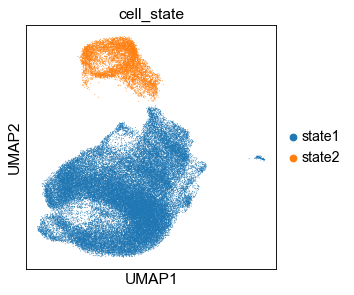

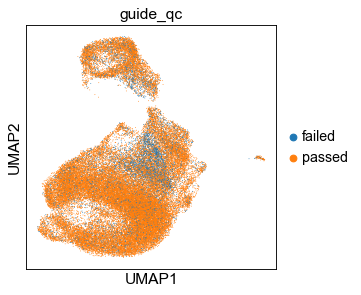

In [4]:
#filter out small cell state
sc.pl.umap(adata,color='cell_state')
sc.pl.umap(adata,color='guide_qc')

In [11]:
#FILTERING
cell_state_cells=set(adata.obs_names[adata.obs['cell_state']=='state1'])
guide_qc_cells=set(adata.obs_names[adata.obs['guide_qc']=='passed'])
keep=list(cell_state_cells.intersection(guide_qc_cells))
print(len(keep))

adata=adata[keep,:]
adata._init_as_actual(adata.copy())
adata

38677


AnnData object with n_obs × n_vars = 38677 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTS

In [12]:
adata.write(pref+'.guide_qc.filtered.h5ad')

Stopping point
==

In [4]:
adata=sc.read(pref+'.guide_qc.filtered.h5ad')
adata

Only considering the two last: ['.filtered', '.h5ad'].
Only considering the two last: ['.filtered', '.h5ad'].


AnnData object with n_obs × n_vars = 38677 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTS

In [5]:
#get variable genes, run linear model
adata=adata[:,adata.var_names[adata.var['highly_variable']]]
adata

View of AnnData object with n_obs × n_vars = 38677 × 1246
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2'

In [6]:
adata.obs['gene.compact'].value_counts()

unassigned    13386
DPF3           1703
BCL7B          1422
SMARCA2        1407
BCL7A          1400
SMARCD3        1364
SMARCC2        1323
SS18           1226
control        1162
SS18L          1134
PBRM1          1119
BCL7C           963
SMARCD1         959
GLTSCR1         938
BRD9            922
BRD7            836
SMARCC1         818
ACTL6B          755
DPF2            694
PHF10           689
SMARCD2         661
ARID1A          599
ARID2           523
SMARCA4         453
SMARCB1         429
GLTSCR1L        418
SMARCE1         397
ACTL6A          372
DPF1            330
ARID1B          275
Name: gene.compact, dtype: int64

In [7]:
var_genes=adata.var_names[adata.var['highly_variable']]
covariates=['batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 
         'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 
         'batch_num10', 'batch_num1', 'batch_num7',
            'percent_mito', 'n_counts',
           ]
genes_perturbed=list(set(adata.obs['gene.compact']).difference(set(['unassigned','control'])))

In [8]:
#run a few linear models, and pick a good one based on its prediction performance
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
my_rng=np.random.RandomState(1234)

adata_small=adata[:,var_genes].copy()
adata_small.raw=sc.AnnData(adata_small.raw[:,var_genes].to_adata())

splitting train    30941
test      3868
valid     3868
Name: train_valid_test, dtype: int64
Found 28/28 perturbations
Found 0/0 obs
Found 17/17 covariates
(25291, 28) (25291, 17) (25291, 1246)
train    30941
test      3868
valid     3868
Name: PS.alpha.5e-05.train_valid_test, dtype: int64
train 20224
valid 2527
test 2540

Fitting model
 ElasticNet(alpha=5e-05, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7F86054D7640)
x (25291, 45)
model coeff (1246, 45)
splitting train    30941
test      3868
valid     3868
Name: train_valid_test, dtype: int64
Found 28/28 perturbations
Found 0/0 obs
Found 17/17 covariates
(25291, 28) (25291, 17) (25291, 1246)
train    30941
test      3868
valid     3868
Name: PS.alpha.0.0005.train_valid_test, dtype: int64
train 20224
valid 2527
test 2540

Fitting model
 ElasticNet(alpha=0.0005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7F86054D7640)
x (25291, 45)
model coeff (1246, 45)
splitting train    30941
test      386

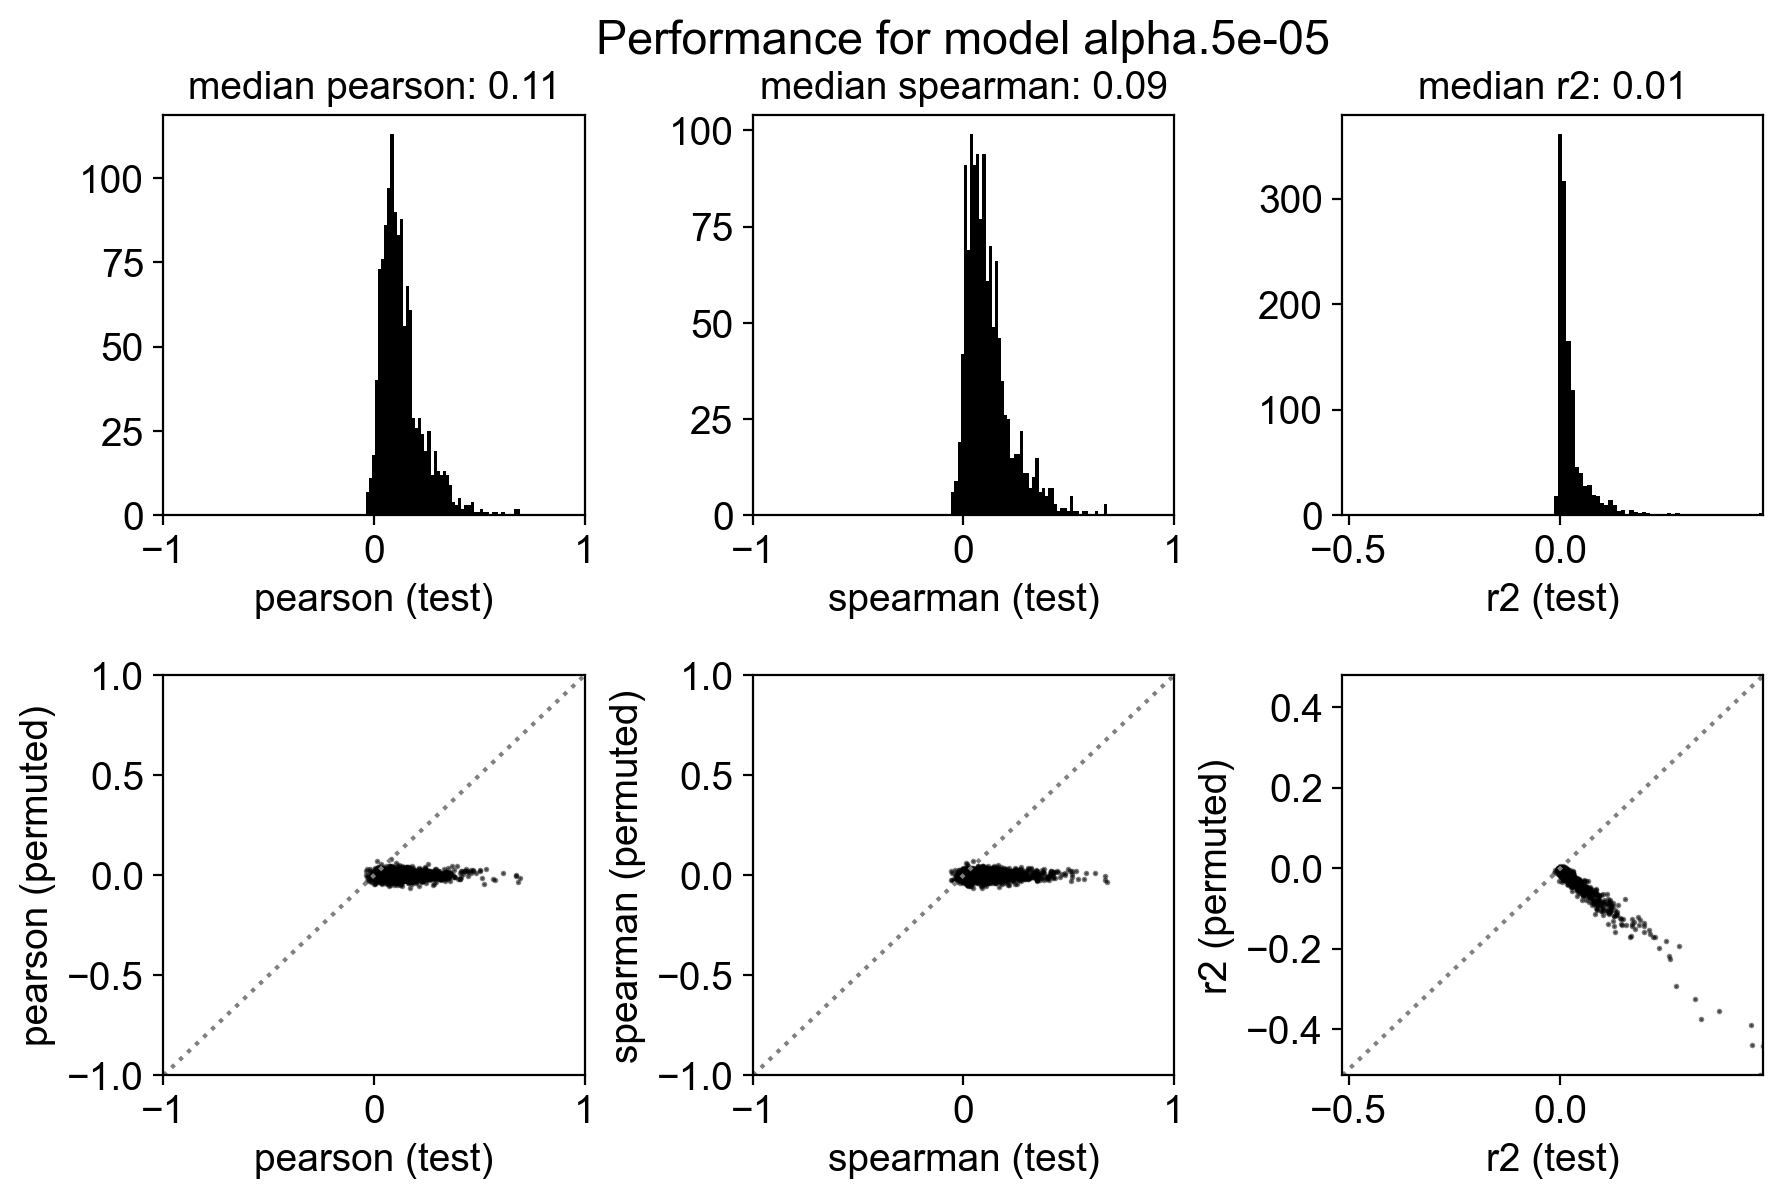

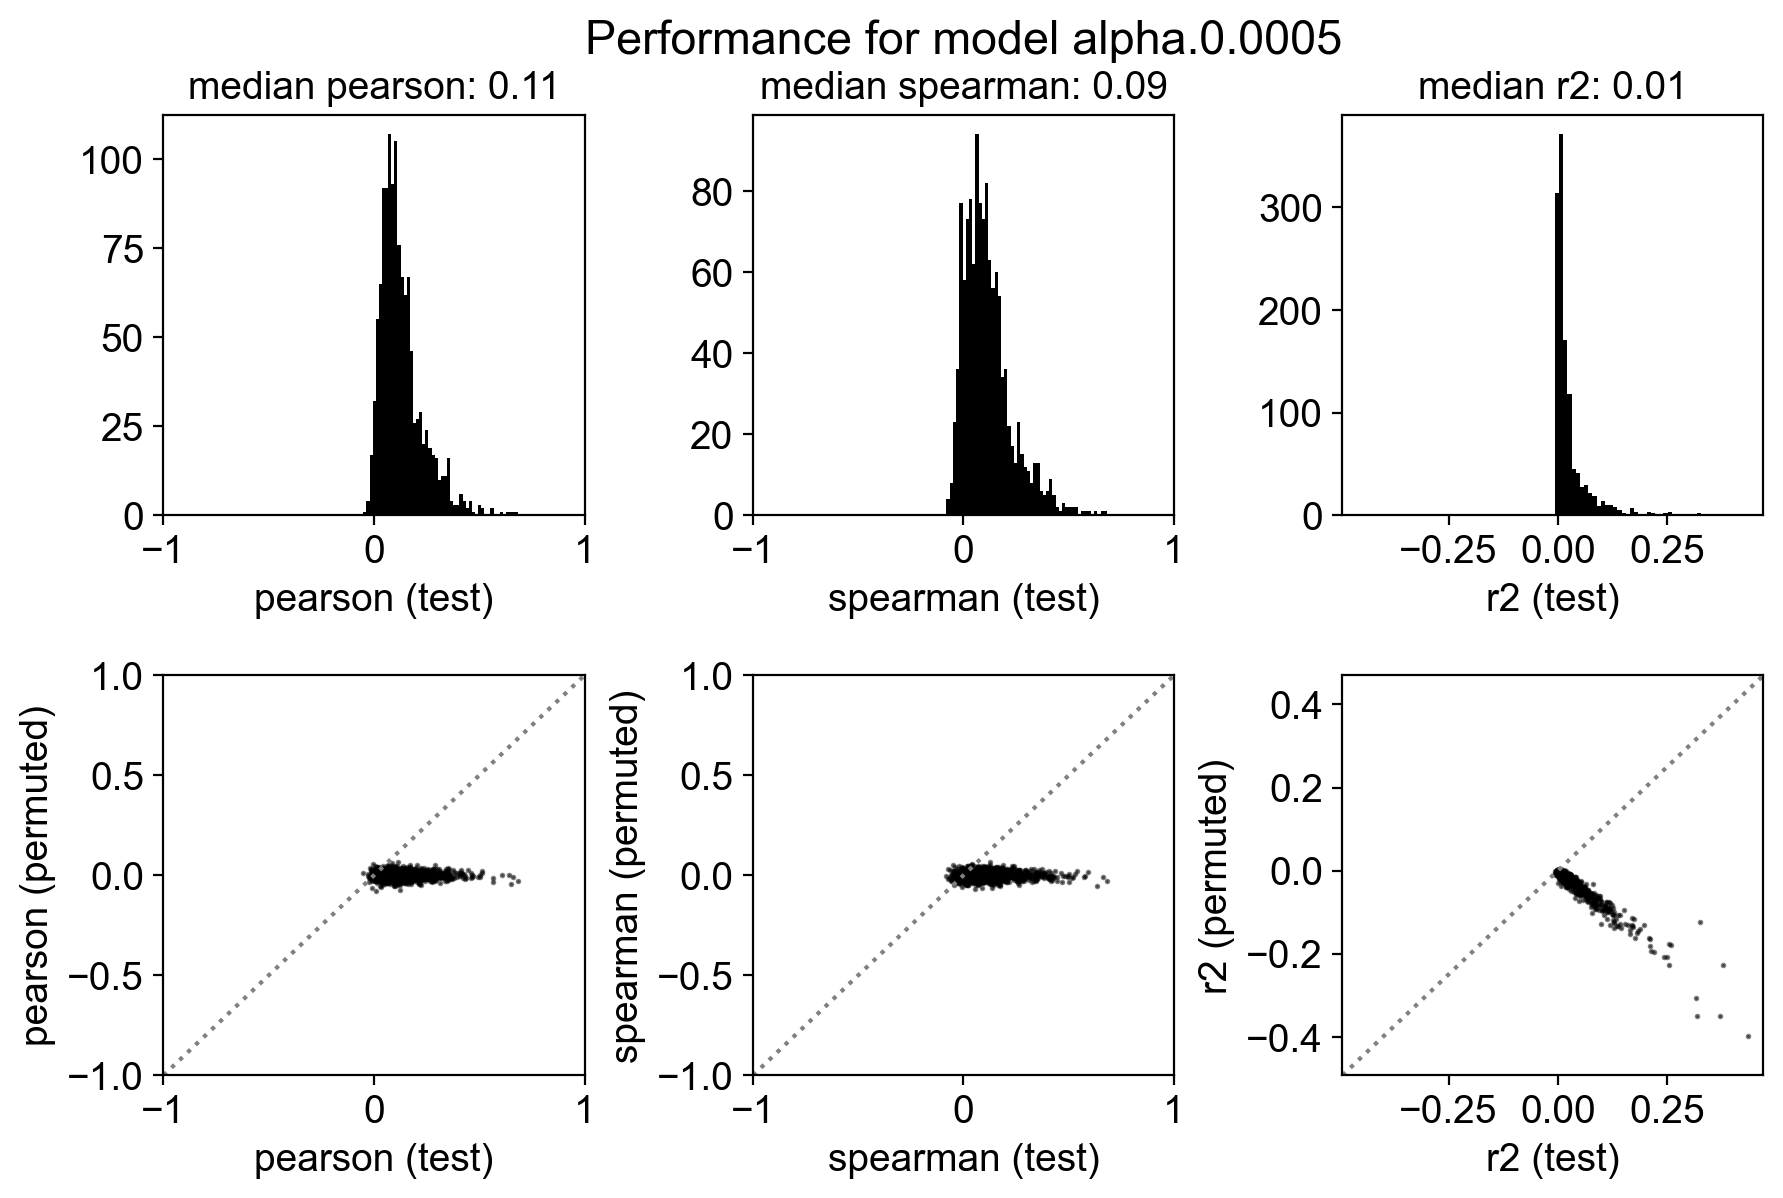

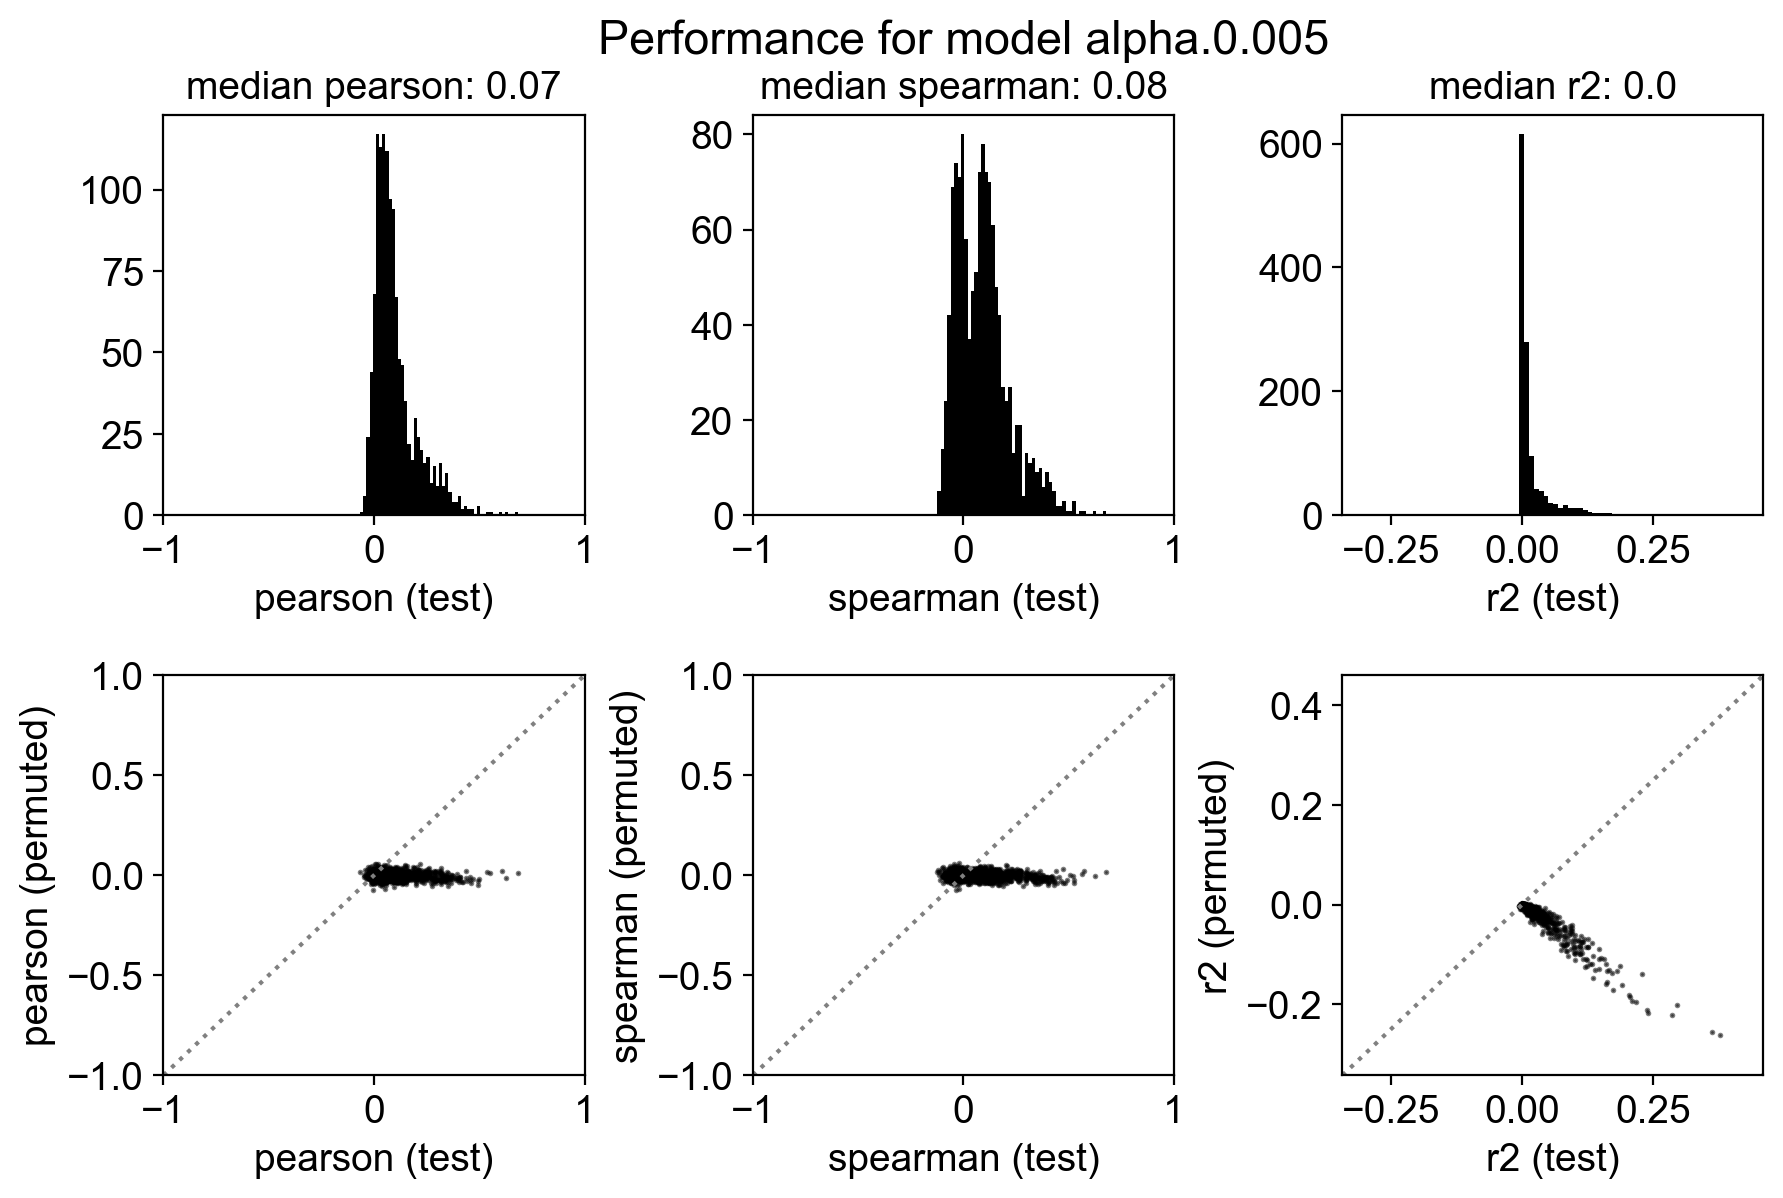

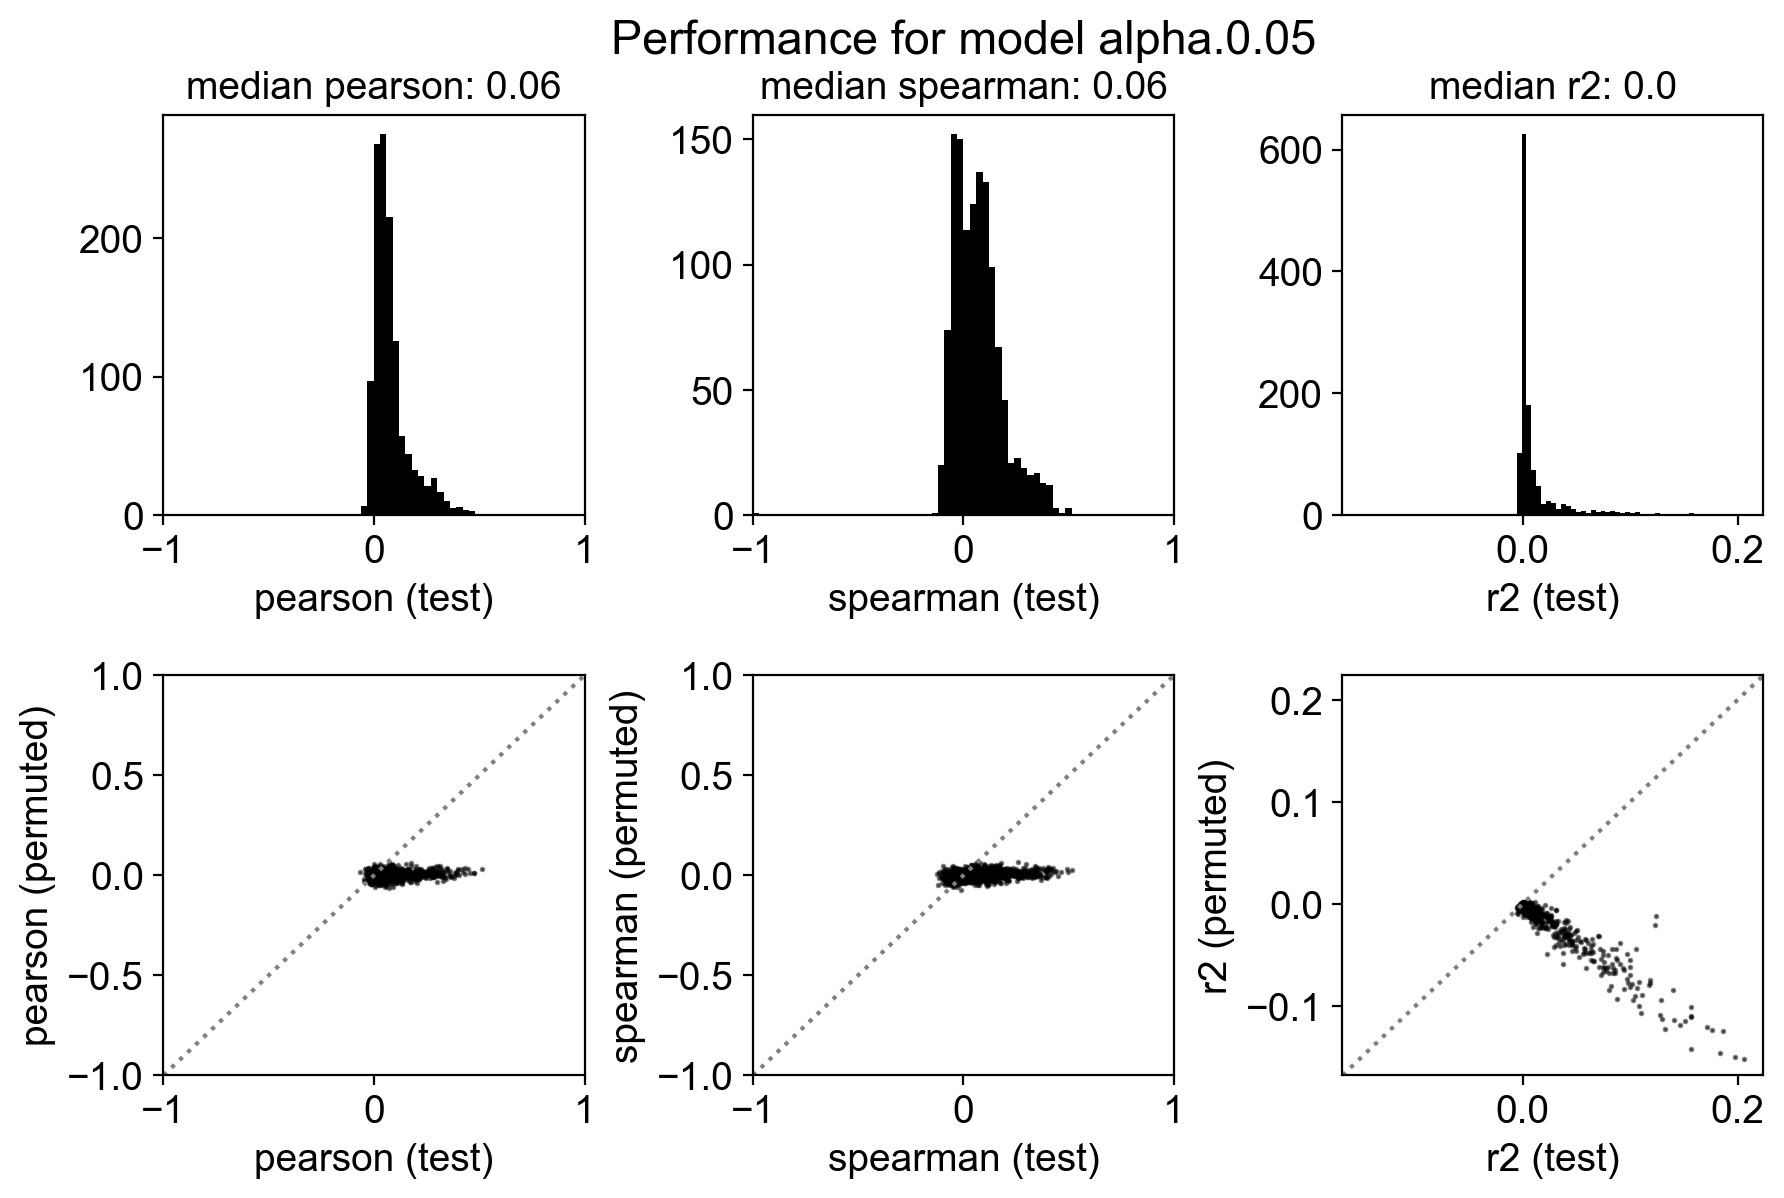

In [12]:
for alpha in [
              0.00005,
              0.0005,
              0.005,
              0.05,
             ]:
    reg=linear_model.ElasticNet(l1_ratio=0.5,alpha=alpha,max_iter=10000,random_state=my_rng)
    modelname='alpha.'+str(alpha)

    perturb.lm.train_lm(adata_small,
        lm=reg,
        include_expression=True,
        y_obs=[],
        model_name=modelname,
        perturbations_list=genes_perturbed,
        covariates_list=covariates,
        rng=np.random.RandomState(1234),
        adjust=False,
         adjust_vars=[],
        copy_adata=False,
        keep_unassigned=False,
         control_names=['control'],
       use_raw=True)

    perturb.pl.plot_model_performance(adata_small,modelname)

The best model was 0.0005, equal to 0.00005.

In [13]:
#save all models
adata_small.write(pref+'.guide_qc.lm.h5ad')

... storing 'PS.alpha.5e-05.train_valid_test' as categorical
... storing 'PS.alpha.5e-06.train_valid_test' as categorical
... storing 'PS.alpha.0.0005.train_valid_test' as categorical
... storing 'PS.alpha.0.005.train_valid_test' as categorical
... storing 'PS.alpha.0.05.train_valid_test' as categorical


Model plots
==

In [3]:
adata=sc.read(pref+'.guide_qc.lm.h5ad')
adata

Only considering the two last: ['.lm', '.h5ad'].
Only considering the two last: ['.lm', '.h5ad'].


AnnData object with n_obs × n_vars = 38677 × 1246
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTSC

In [4]:
modelname='alpha.0.0005'

In [5]:
var_genes=adata.var_names[adata.var['highly_variable']]
covariates=['batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 
         'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 
         'batch_num10', 'batch_num1', 'batch_num7',
            'percent_mito', 'n_counts',
           ]
genes_perturbed=list(set(adata.obs['gene.compact']).difference(set(['unassigned','control'])))

In [6]:
coef=adata.uns['PS.'+modelname+'.coef']
coef.index=list(adata.var_names)
print(coef.shape)
print(coef.columns)
adata.uns['coef.gene2']=coef.T.loc[genes_perturbed,:]

(1246, 45)
Index(['BCL7B', 'SS18L', 'SMARCC1', 'PHF10', 'GLTSCR1L', 'ACTL6A', 'SMARCE1',
       'PBRM1', 'SMARCC2', 'ACTL6B', 'BCL7C', 'BCL7A', 'SMARCA2', 'DPF2',
       'ARID1A', 'GLTSCR1', 'BRD7', 'ARID2', 'SMARCD3', 'SMARCD2', 'SMARCA4',
       'SMARCB1', 'SMARCD1', 'DPF1', 'BRD9', 'SS18', 'ARID1B', 'DPF3',
       'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4',
       'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8',
       'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7',
       'percent_mito', 'n_counts'],
      dtype='object')


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


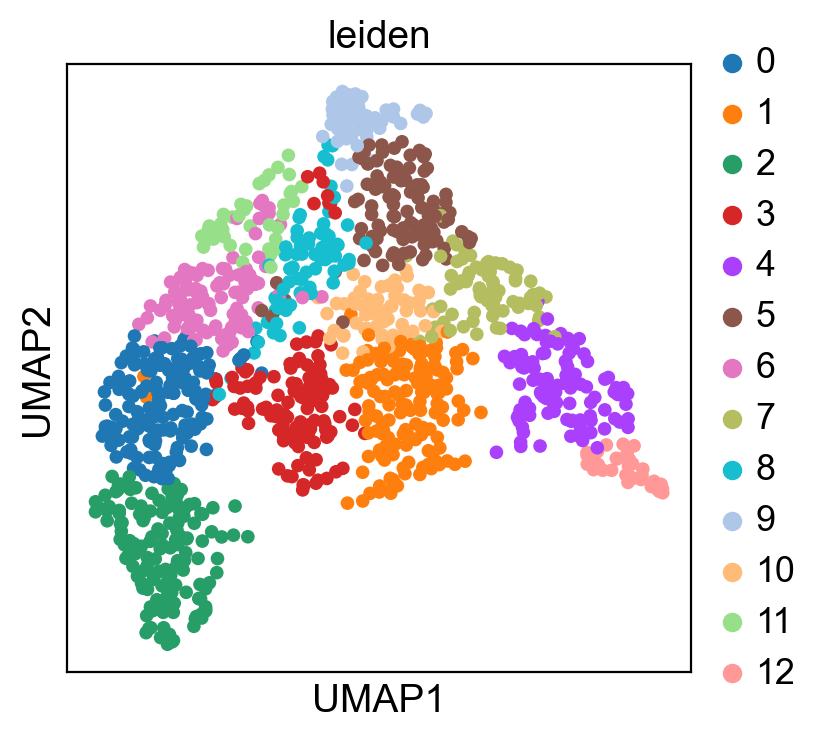

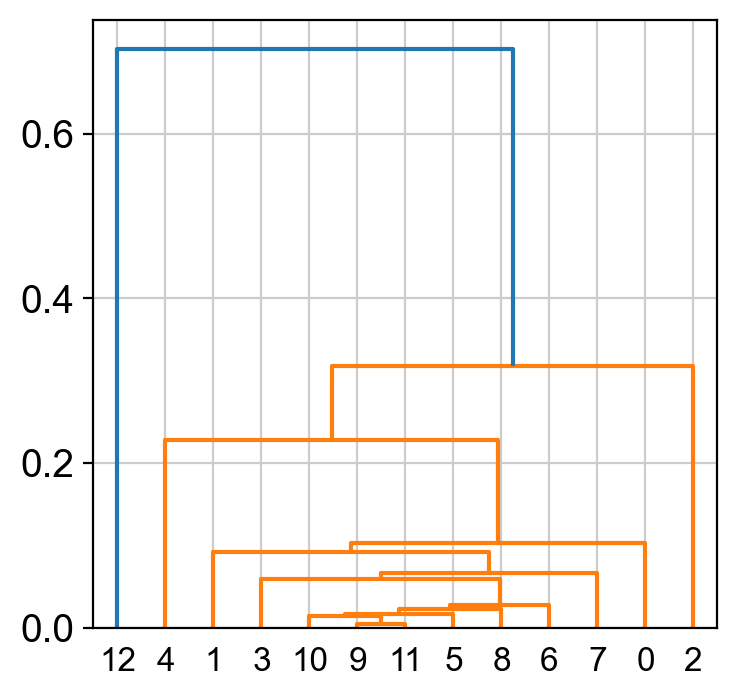

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


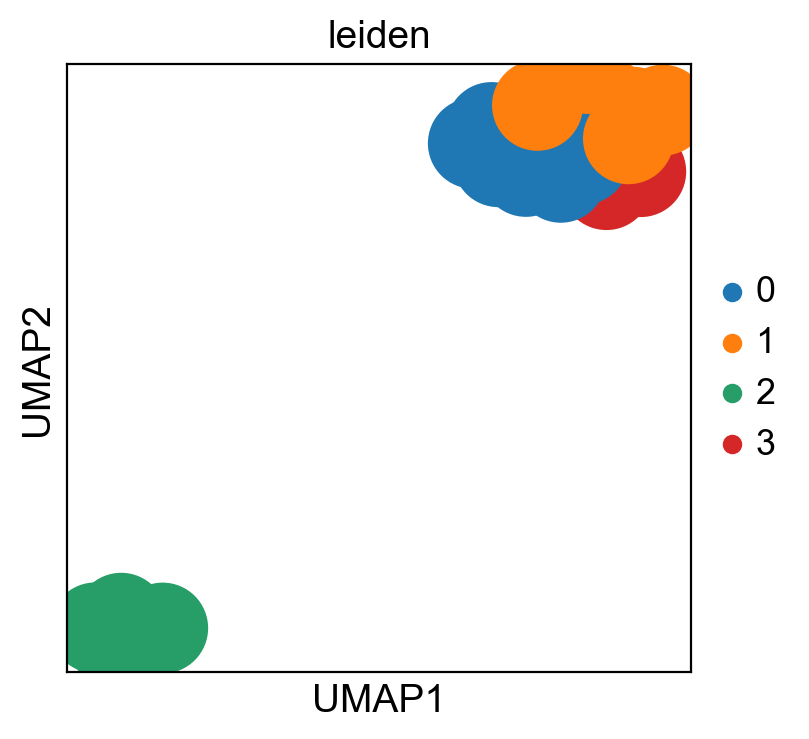

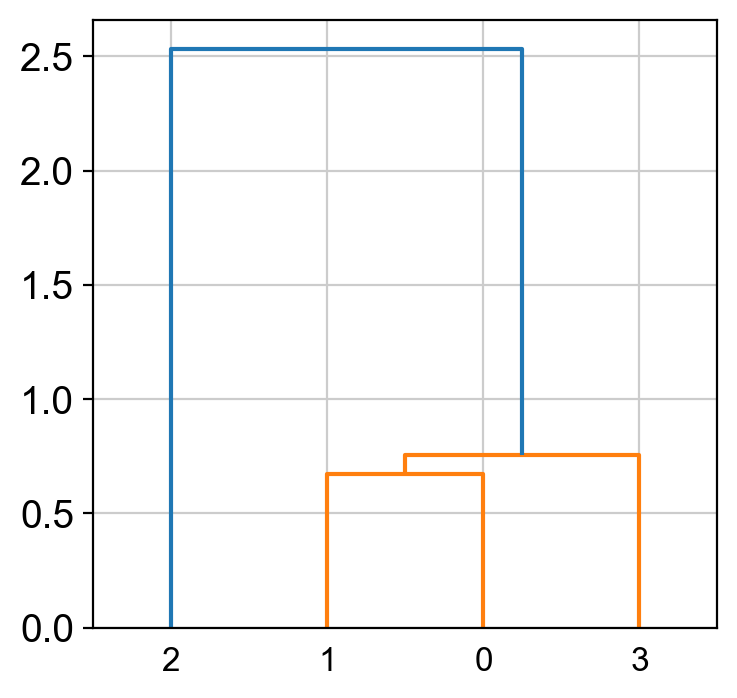

In [7]:
perturb.tl.gene_programs_and_perturbation_modules(adata,
                                                  input_type='coef',
                                                  perturbation_name='gene2',
                                           n_neighbors_programs=5,
                                                  n_neighbors_modules=5,
                                                  cluster_within=False,
                                                  copy=False,cmap_programs='Set2',
                                                  cmap_modules='Set2')

In [8]:
n='coef'
sc_bulk=adata.uns[n+'.gene2'].T.loc[adata.var_names,:]
sc_bulk['module']=adata.var[n+'.gene2.program']
sc_bulk=sc_bulk.sort_values(by='module')
sc_bulk=sc_bulk.drop(columns=['module'])
gene_pro_color=pd.DataFrame({'gene program':adata.var[n+'.gene2.program_color']},
                           index=adata.var_names)

In [9]:
pro_variable=n+'.gene2.program'
programs=list(set(adata.var[pro_variable]))
print(programs)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [10]:
for pro in programs:
    sc.tl.score_genes(adata, 
                      list(adata.var_names[adata.var[pro_variable]==pro]), 
                      ctrl_size=50, 
                      score_name='P'+str(pro),
                      use_raw=True)

computing score 'P0'
    finished: added
    'P0', score of gene set (adata.obs).
    217 total control genes are used. (0:00:00)
computing score 'P1'
    finished: added
    'P1', score of gene set (adata.obs).
    496 total control genes are used. (0:00:00)
computing score 'P2'
    finished: added
    'P2', score of gene set (adata.obs).
    1003 total control genes are used. (0:00:00)
computing score 'P3'
    finished: added
    'P3', score of gene set (adata.obs).
    1029 total control genes are used. (0:00:00)
computing score 'P4'
    finished: added
    'P4', score of gene set (adata.obs).
    785 total control genes are used. (0:00:00)
computing score 'P5'
    finished: added
    'P5', score of gene set (adata.obs).
    382 total control genes are used. (0:00:00)
computing score 'P6'
    finished: added
    'P6', score of gene set (adata.obs).
    361 total control genes are used. (0:00:00)
computing score 'P7'
    finished: added
    'P7', score of gene set (adata.obs).
    99

In [12]:
bulk_programs,p=perturb.pp.obs_mean_with_sig(adata,
                    obs_list=['P'+str(x) for x in programs],
                    ref='control',
                   grouping_variable='gene.compact')

P0
P1
P2
P3
P4
P5
P6
P7
P8
P9
P10
P11
P12


Index(['P0', 'P1', 'P10', 'P2', 'P4', 'P7', 'P5', 'P6', 'P9', 'P8', 'P3',
       'P11', 'P12'],
      dtype='object')

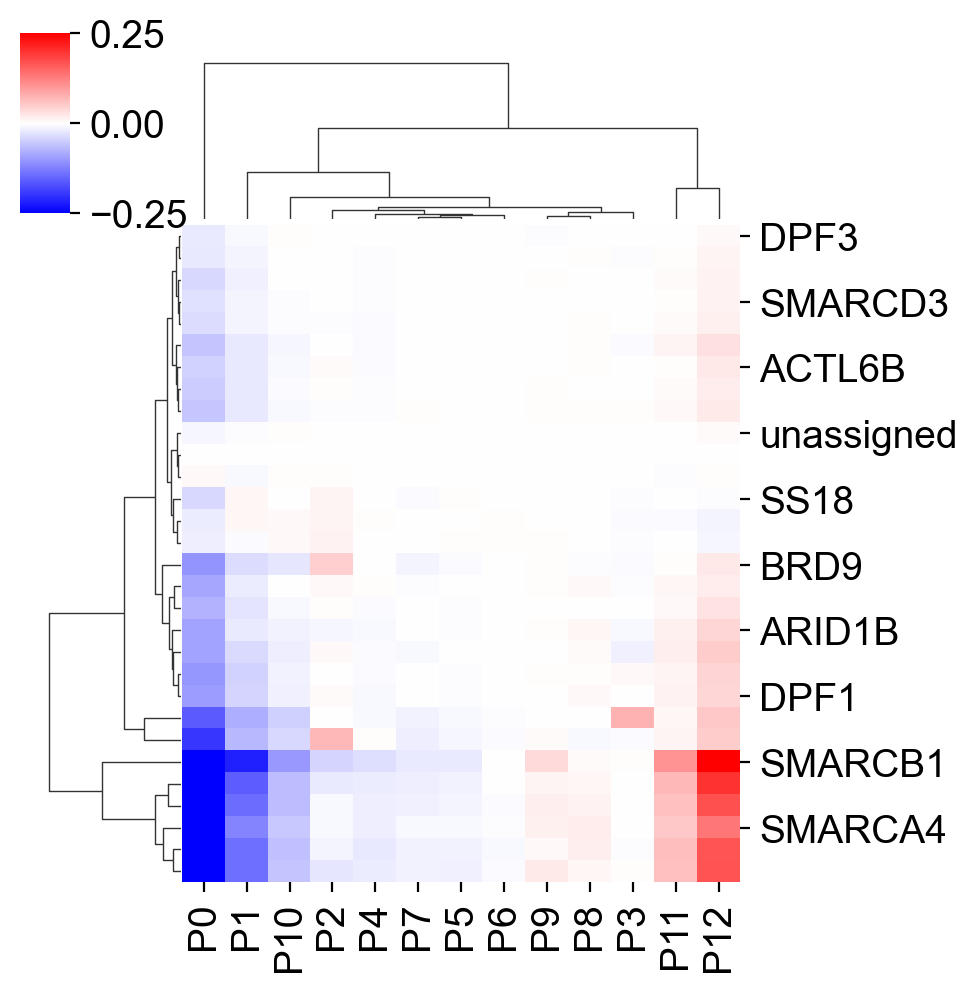

In [13]:
from scipy.cluster import hierarchy
import seaborn as sns

col_Z = hierarchy.linkage(bulk_programs.T,
                     optimal_ordering=True,
                          metric='cityblock',
                     method='complete',
                         )

x=0.25
g=sns.clustermap(bulk_programs,cmap='bwr',vmin=-x,vmax=x,
              figsize=(5,5),col_linkage=col_Z,
              )
sorted_programs=bulk_programs.iloc[:,g.dendrogram_col.reordered_ind].columns
sorted_programs

In [14]:
#reorder sc_bulk and rename programs
import re

pro_rename={}
for i in range(len(sorted_programs)):
    pro_rename['.P'+str(i)]=sorted_programs[i]
print(pro_rename)

adata.var['new_program']='na'
new_sc_bulk=pd.DataFrame(columns=sc_bulk.columns)
for new_p in range(len(sorted_programs)):
    old_p=pro_rename['.P'+str(new_p)]
    print(old_p)
    genes_here=list(adata.var_names[adata.var[pro_variable]==int(re.sub('P','',old_p))])
    print(genes_here[:5])
    adata.var['new_program'].loc[genes_here]='P'+str(new_p)
    new_sc_bulk_here=sc_bulk.loc[genes_here,:]
    new_sc_bulk=pd.concat([new_sc_bulk,new_sc_bulk_here],axis=0)
    adata.obs['.P'+str(new_p)]=adata.obs[old_p]
    

{'.P0': 'P0', '.P1': 'P1', '.P2': 'P10', '.P3': 'P2', '.P4': 'P4', '.P5': 'P7', '.P6': 'P5', '.P7': 'P6', '.P8': 'P9', '.P9': 'P8', '.P10': 'P3', '.P11': 'P11', '.P12': 'P12'}
P0
['HMGN2', 'PHGDH', 'RAB13', 'ANXA4', 'IGFBP2']
P1
['STMN1', 'CLSPN', 'PABPC4', 'CITED4', 'ECM1']
P10
['PPT1', 'CDC20', 'GPX7', 'HIST2H2AC', 'CKS1B']
P2
['SERINC2', 'CDKN2C', 'LMO4', 'F3', 'SORT1']
P4
['THEMIS2', 'BMP8B', 'DEPDC1', 'GBP2', 'C1orf56']
P7
['ID3', 'FGR', 'AK4', 'GADD45A', 'RP11-386I14.4']
P5
['MIR34AHG', 'RP5-943J3.2', 'THBS3', 'SH2D2A', 'CD48']
P6
['HIVEP3', 'SEMA4A', 'MR1', 'GNG4', 'NFKBIZ']
P9
['TNFRSF1B', 'RCAN3', 'CSF3R', 'CDCA8', 'MYCL']
P8
['ISG15', 'RP3-395M20.12', 'TNFRSF14', 'CD52', 'SYTL1']
P3
['FUCA1', 'RSRP1', 'RP5-1092A3.4', 'MUC1', 'RASAL2']
P11
['HES4', 'CNR2', 'RUNX3', 'PTAFR', 'PTP4A2']
P12
['LAPTM5', 'CAP1', 'ZCCHC11', 'TXNIP', 'MCL1']


/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [15]:
adata.var['new_program']

HES4             P11
ISG15             P9
RP3-395M20.12     P9
TNFRSF14          P9
MIR34AHG          P6
                ... 
MT-ND2            P1
MT-ATP8           P1
MT-ND4L           P2
MT-ND6            P0
MT-CYB            P8
Name: new_program, Length: 1246, dtype: object

In [16]:
adata.var['new_program.color']=perturb.tl.cat2color(adata.var['new_program'],color_map=None,cmap='Set2')

Index(['SMARCB1', 'SMARCD2', 'SMARCC1', 'ARID1A', 'SMARCA4', 'SMARCE1',
       'ACTL6A', 'DPF2', 'SS18', 'BCL7A', 'GLTSCR1', 'GLTSCR1L', 'BRD7',
       'PBRM1', 'PHF10', 'ARID1B', 'SMARCC2', 'ACTL6B', 'SS18L', 'BCL7B',
       'SMARCD3', 'DPF3', 'BCL7C', 'SMARCA2', 'DPF1', 'ARID2', 'BRD9',
       'SMARCD1'],
      dtype='object')


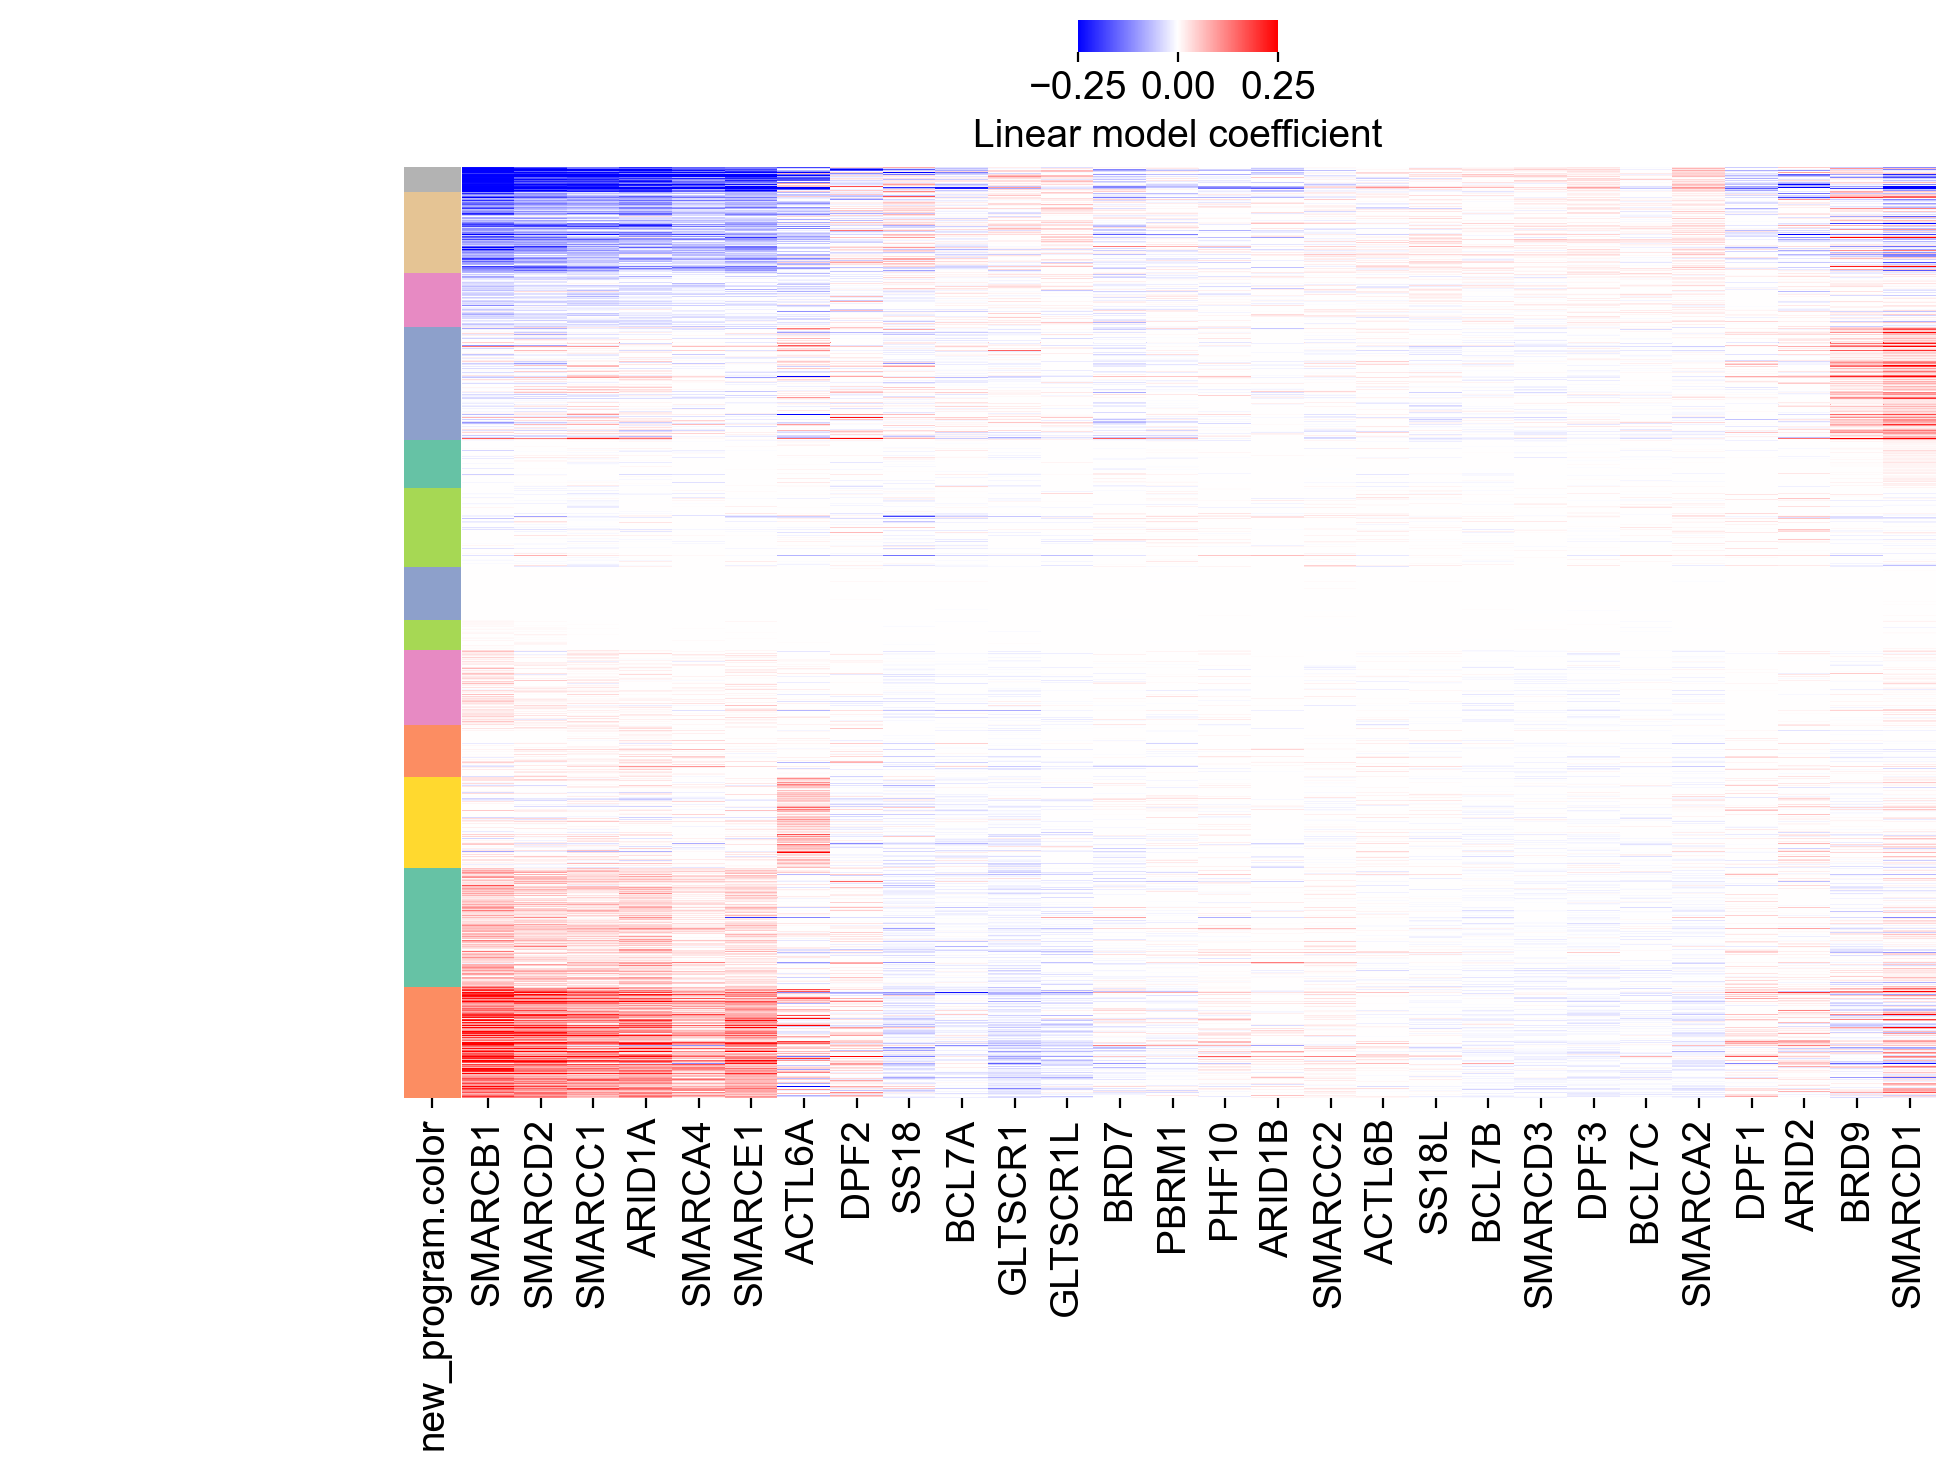

In [17]:
col_Z = hierarchy.linkage(new_sc_bulk.T,
                     optimal_ordering=True,
                     method='average',
                         )

x=0.25
g=sns.clustermap(new_sc_bulk,col_linkage=col_Z,
               row_cluster=False,col_cluster=True,
               xticklabels=True,
                 yticklabels=False,
               figsize=(10,8),
               cbar_pos=(0.55, 0.9, 0.1, 0.02),
                 cbar_kws={'orientation':'horizontal',
                "label": "Linear model coefficient",
                'ticks':[-x,0,x]},
               cmap='bwr',vmin=-x,vmax=x,
              row_colors=adata.var['new_program.color'],
                )
g.ax_col_dendrogram.set_visible(False)
plt.savefig(FIGS+'single.regMat.'+modelname+'.heatmap.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'single.regMat.'+modelname+'.heatmap.png',transparent=True,bbox_inches='tight')

sorted_perturbs=sc_bulk.iloc[:,g.dendrogram_col.reordered_ind].columns
print(sorted_perturbs)

In [18]:
bulk_programs,p=perturb.pp.obs_mean_with_sig(adata,
                    obs_list=['.P'+str(x) for x in programs],
                    ref='control',
                   grouping_variable='gene.compact')

.P0
.P1
.P2
.P3
.P4
.P5
.P6
.P7
.P8
.P9
.P10
.P11
.P12


In [28]:
?perturb.pl.dotplot2

/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sizes[sizes<best_p]=best_p
/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:270: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.bwr),


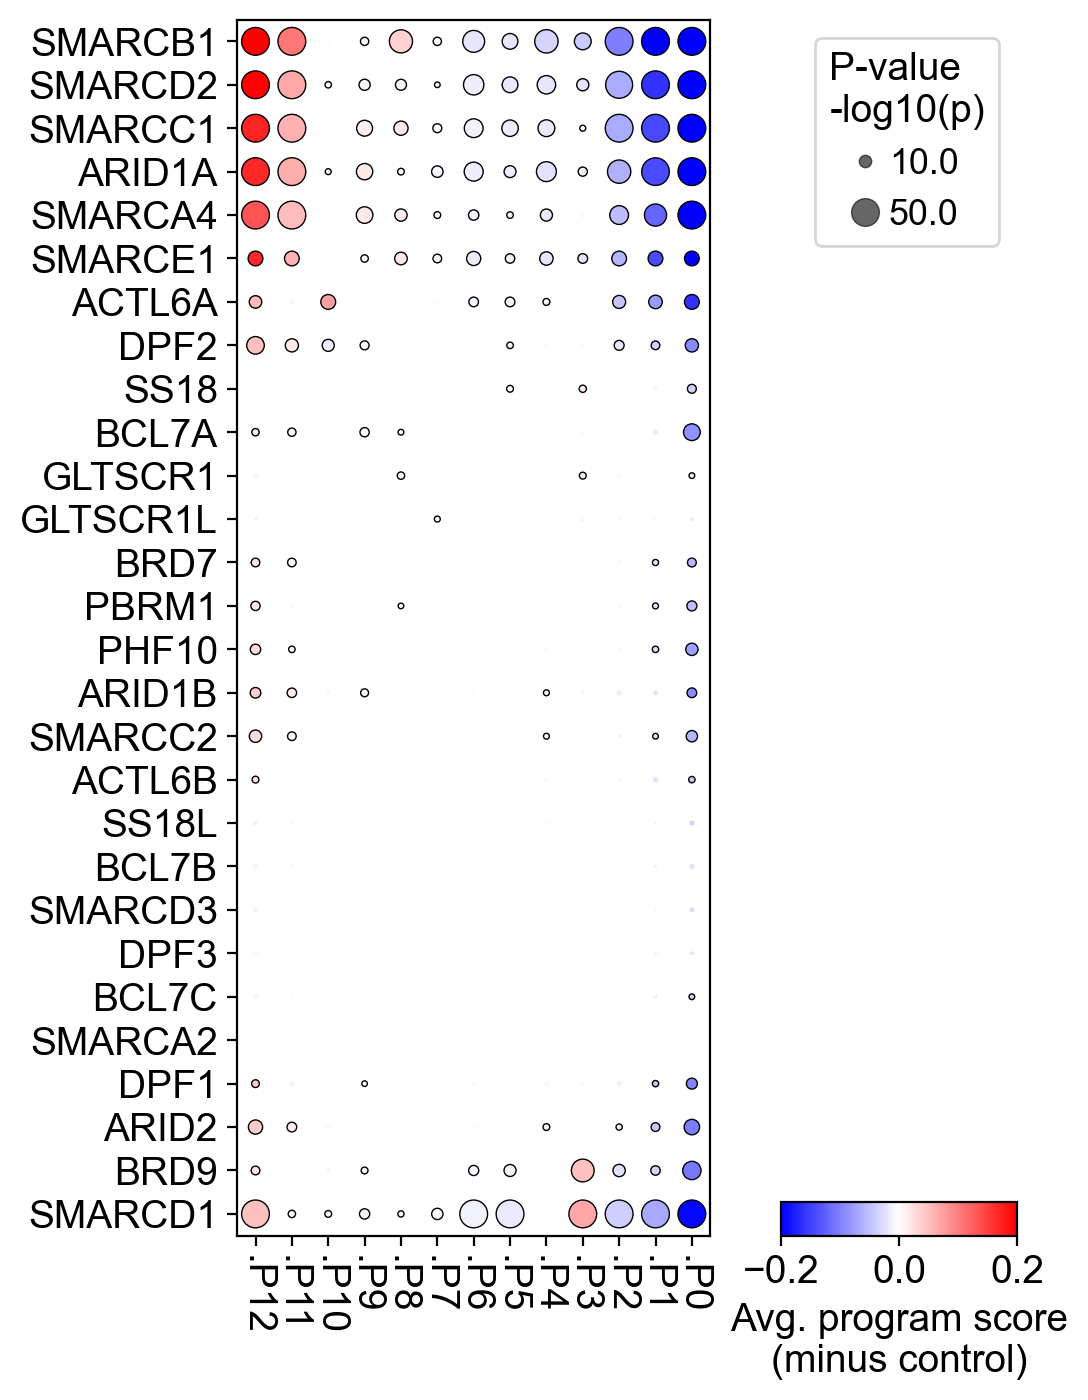

In [32]:
perturb.pl.dotplot2(bulk_programs,p,['.P'+str(x) for x in programs],
                    sorted_perturbs,best_p=1e-50,
                 vmin=-0.2,vmax=0.2,
                title='Avg. program score\n(minus control)',
                cbar_percent='3%',w=5,h=8,widths=[1,0.5])
plt.savefig(FIGS+'single.regMat.'+modelname+'.programsDotplot.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'single.regMat.'+modelname+'.programsDotplot.png',transparent=True,bbox_inches='tight')

In [33]:
#GO
def programs2go(program2gene_dict,organism="hsapiens"):
    
    gotable=pd.DataFrame(columns=['name','p_value','program'])
    
    for program in program2gene_dict:
        print(program)
        genes=program2gene_dict[program]
        go_res=sc.queries.enrich(genes, org=organism)
        #go_res=go_res.loc[go_res['significant'],:]
        #print(go_res.head())
        gotable_current=go_res.loc[go_res['source']=='GO:BP',['name','p_value']]
        if gotable_current.shape[0]==0:
            continue
        #correct p-value for multiple testing
        from statsmodels.stats.multitest import multipletests
        gotable_current['p_value2']=multipletests(gotable_current['p_value'],method='fdr_bh')[1]
        gotable_current['program']='Pro: '+str(program)
        gotable=pd.concat([gotable,gotable_current],axis=0)
    go_table_result=gotable.pivot(index='name',columns='program')[['p_value2']]
    go_table_result=go_table_result.fillna(1)
    go_table_result=-np.log10(go_table_result)
    
    #go through each program and print me the sig go terms
    for program in go_table_result.columns:
        keep=go_table_result.loc[go_table_result[program]>1.0,:]
        keep=keep.sort_values(by=program,ascending=False)[program]
        print(program)
        print(keep)
        print('======')
    return(go_table_result)


pro_variable='new_program'
score_names=list(set(adata.var[pro_variable]))
pro2gene={}
for cl in score_names:
    pro2gene[cl]=list(adata.var_names[adata.var[pro_variable]==cl])
print(pro2gene)

gos=programs2go(pro2gene)

{'P9': ['ISG15', 'RP3-395M20.12', 'TNFRSF14', 'CD52', 'SYTL1', 'COL9A2', 'ADGRL2', 'CHML', 'RHOB', 'RBKS', 'PELI1', 'GNLY', 'CYTIP', 'ALS2', 'CCR2', 'RP11-154H23.3', 'ABTB1', 'SUCNR1', 'TIPARP', 'SERPINI1', 'ZMAT3', 'CXCL10', 'LINC01021', 'PLK2', 'NREP', 'IRF1', 'CTC-338M12.5', 'TMEM170B', 'HIVEP1', 'RUNX2', 'DLX6-AS1', 'TFEC', 'ZBTB33', 'RP11-51J9.5', 'MSC', 'CA2', 'RP11-410L14.2', 'TRIB1', 'PLIN2', 'CORO2A', 'MIR210HG', 'TRIM22', 'CD44', 'NCAM1', 'BLNK', 'UTF1', 'CLECL1', 'STAT2', 'SHISA2', 'GPR18', 'GAS6', 'ZFP36L1', 'VASH1', 'RPS6KA5', 'BUB1B', 'RPS27L', 'ITPRIPL2', 'ORAI3', 'XAF1', 'GAS7', 'SLFN5', 'CD300C', 'NDC80', 'THBD', 'CA11', 'A1BG', 'CECR1', 'UPK3A', 'ODF3B', 'ETS2'], 'P2': ['PPT1', 'CDC20', 'GPX7', 'HIST2H2AC', 'CKS1B', 'GLUL', 'RRM2', 'BCYRN1', 'DLX1', 'CAMK1', 'CX3CR1', 'CLDND1', 'RFC4', 'TFRC', 'TACC3', 'CCNA2', 'SLC7A11', 'HBEGF', 'PTTG1', 'SPDL1', 'HIST1H1B', 'CASP8AP2', 'MMS22L', 'ASF1A', 'RNASET2', 'PDGFA', 'UNCX', 'TWISTNB', 'PDIA4', 'INSIG1', 'ZNF395', 'CEBPD', '

P2
P1
P10
P6
P12
P0
P4
P3
P7
P11
P8
P5
('p_value2', 'Pro: P0')
name
detoxification of copper ion                                                 3.776330
stress response to copper ion                                                3.776330
detoxification of inorganic compound                                         3.717300
response to chemical                                                         3.717300
response to zinc ion                                                         3.717300
stress response to metal ion                                                 3.717300
cellular response to zinc ion                                                3.377958
response to stimulus                                                         3.324009
response to organic substance                                                3.306846
cellular response to copper ion                                              3.306846
cellular response to cadmium ion                                        

In [34]:
n='coef'
sc_bulk=adata.uns[n+'.gene2'].T.loc[adata.var_names,:]
sc_bulk['module']=adata.var[n+'.gene2.program']
sc_bulk=sc_bulk.sort_values(by='module')
sc_bulk=sc_bulk.drop(columns=['module'])
gene_pro_color=pd.DataFrame({'gene program':adata.var[n+'.gene2.program_color']},
                           index=adata.var_names)

Index(['SMARCB1', 'SMARCD2', 'SMARCC1', 'ARID1A', 'SMARCA4', 'SMARCE1',
       'ACTL6A', 'DPF2', 'SS18', 'BCL7A', 'GLTSCR1', 'GLTSCR1L', 'BRD7',
       'PBRM1', 'PHF10', 'ARID1B', 'SMARCC2', 'ACTL6B', 'SS18L', 'BCL7B',
       'SMARCD3', 'DPF3', 'BCL7C', 'SMARCA2', 'DPF1', 'ARID2', 'BRD9',
       'SMARCD1'],
      dtype='object')


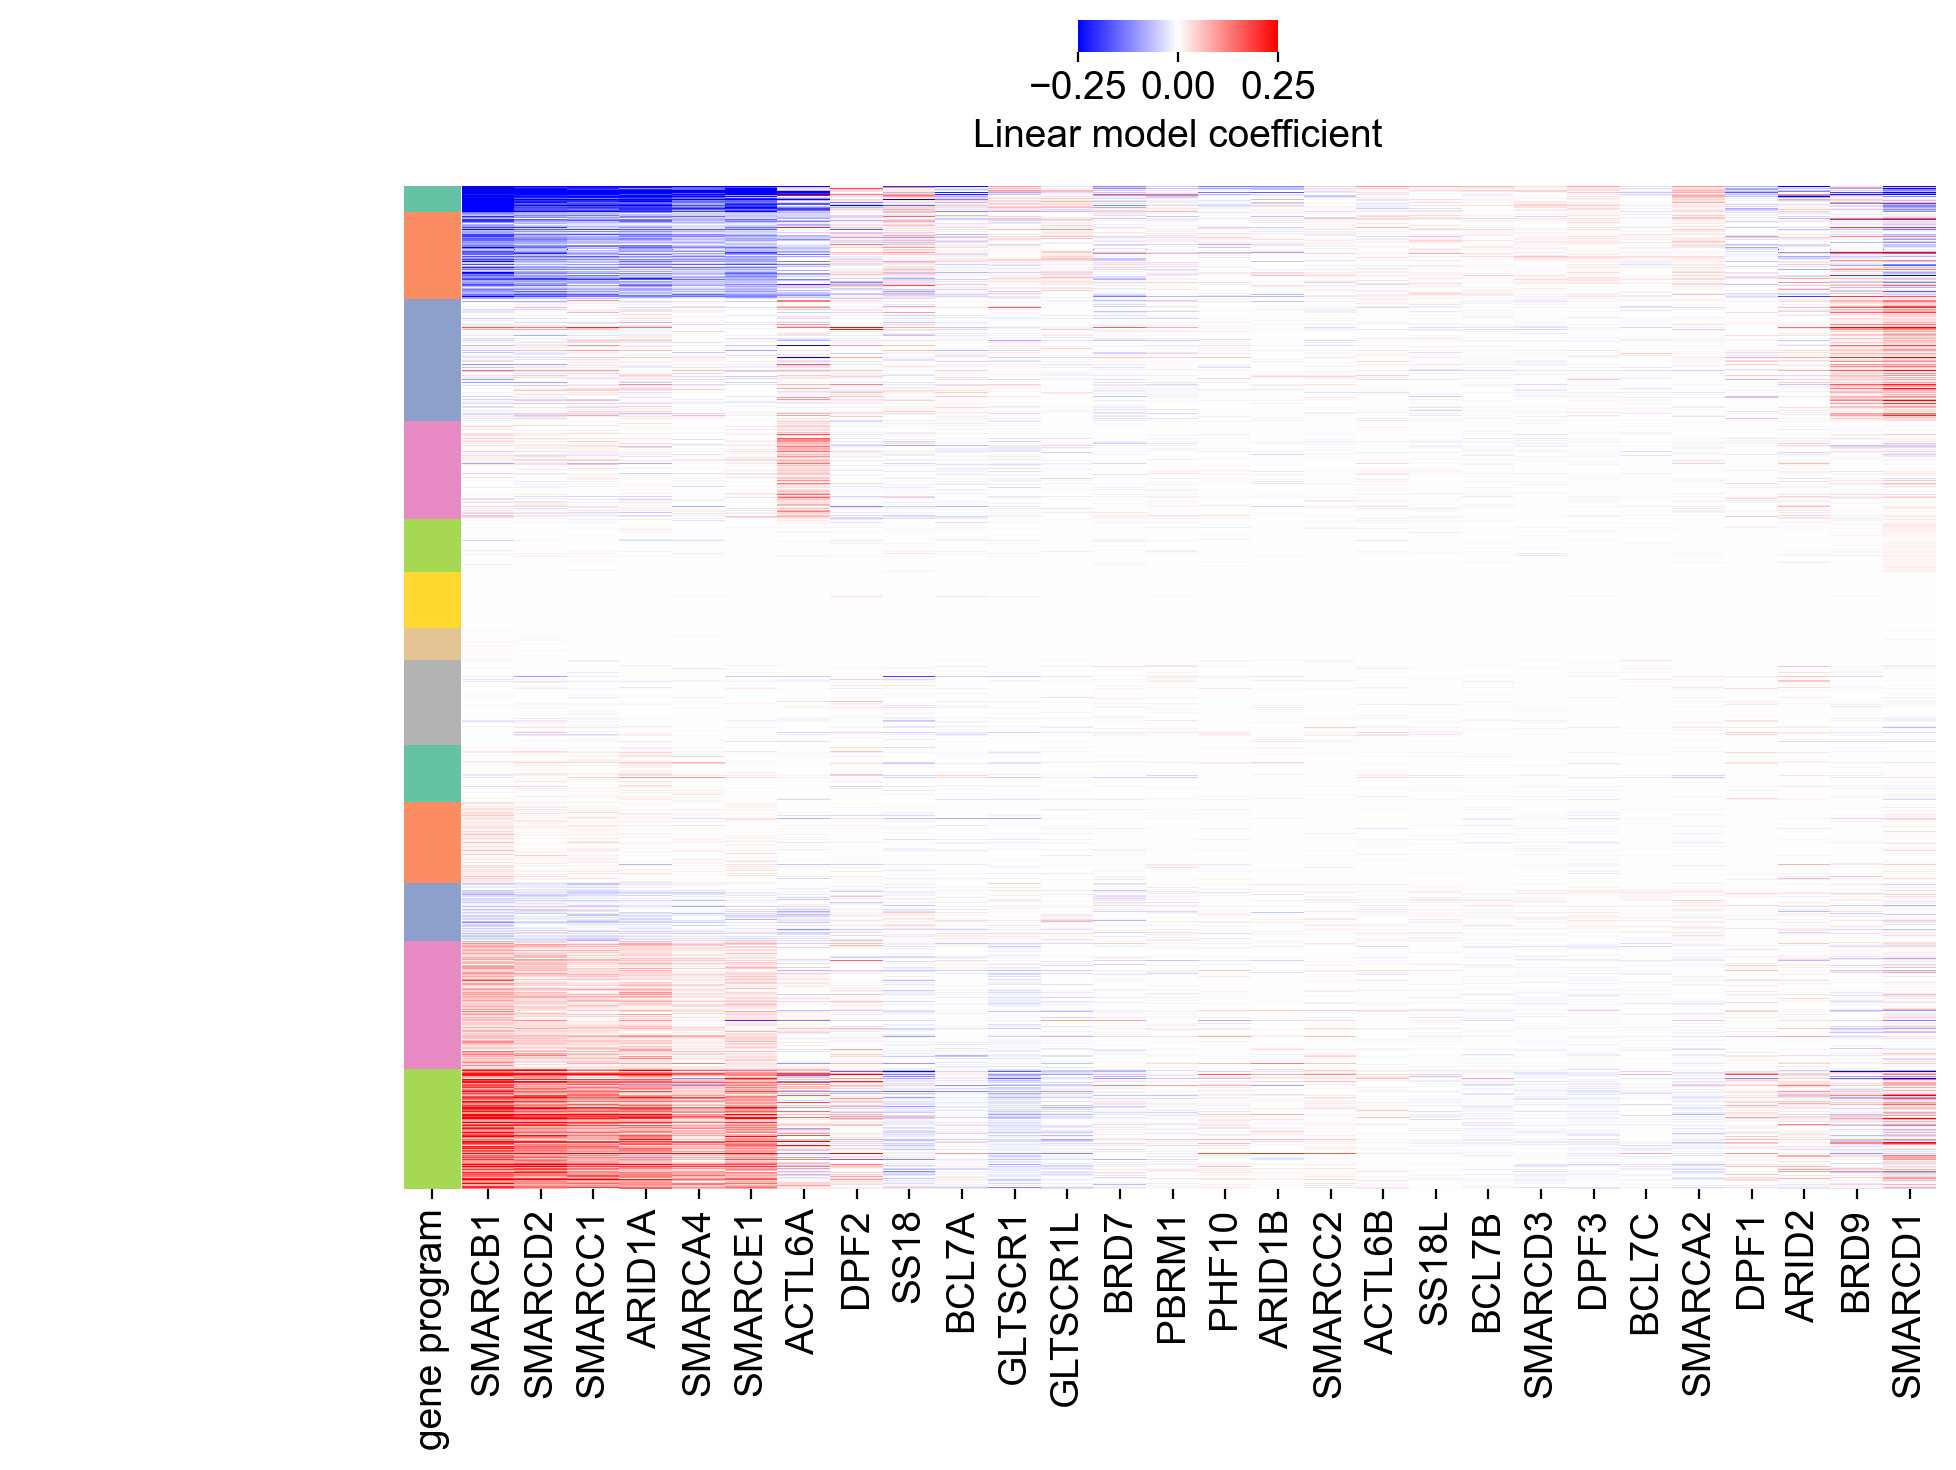

In [35]:
col_Z = hierarchy.linkage(sc_bulk.T,
                     optimal_ordering=True,
                     method='average',
                         )

x=0.25
g=sns.clustermap(sc_bulk,col_linkage=col_Z,
               row_cluster=False,col_cluster=True,
               xticklabels=True,
                 yticklabels=False,
               figsize=(10,8),
               cbar_pos=(0.55, 0.9, 0.1, 0.02),
                 cbar_kws={'orientation':'horizontal',
                "label": "Linear model coefficient",
                'ticks':[-x,0,x]},
               cmap='bwr',vmin=-x,vmax=x,
              row_colors=gene_pro_color)
g.ax_col_dendrogram.set_visible(False)
plt.savefig(FIGS+'single.regMat.'+modelname+'.heatmap.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'single.regMat.'+modelname+'.heatmap.png',transparent=True,bbox_inches='tight')

sorted_perturbs=sc_bulk.iloc[:,g.dendrogram_col.reordered_ind].columns
print(sorted_perturbs)

In [36]:
adata

AnnData object with n_obs × n_vars = 38677 × 1246
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTSC

In [38]:
adata.write(pref+'.guide_qc.lm.h5ad')

In [3]:
#subsampling qc
adata=sc.read(pref+'.guide_qc.lm.h5ad')
adata

Only considering the two last: ['.lm', '.h5ad'].
Only considering the two last: ['.lm', '.h5ad'].


AnnData object with n_obs × n_vars = 38677 × 1246
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTSC

In [4]:
var_genes=adata.var_names[adata.var['highly_variable']]
covariates=['batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 
         'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 
         'batch_num10', 'batch_num1', 'batch_num7',
            'percent_mito', 'n_counts',
           ]
genes_perturbed=list(set(adata.obs['gene.compact']).difference(set(['unassigned','control'])))

In [23]:
#run a few linear models, and pick a good one based on its prediction performance
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
my_rng=np.random.RandomState(1234)

adata_small=adata[:,var_genes].copy()
adata_small.raw=sc.AnnData(adata_small.raw[:,var_genes].to_adata())

In [24]:
alpha=0.0005

coef_orig=adata.uns['PS.alpha.'+str(alpha)+'.coef'].loc[:,genes_perturbed]
coef_orig

SMARCD1     BCL7C      BRD7     ARID2   SMARCA2   SMARCB1  \
HES4           0.000150 -0.003819 -0.000000  0.000000 -0.000000  0.059432   
ISG15          0.014518 -0.008520 -0.002476  0.026637  0.006289  0.003013   
RP3-395M20.12  0.000000  0.000000 -0.000000  0.000000 -0.000000 -0.000000   
TNFRSF14       0.000000 -0.000000  0.000000  0.000000  0.000000  0.003919   
MIR34AHG      -0.000000  0.000724 -0.000000  0.000000 -0.000000 -0.000000   
...                 ...       ...       ...       ...       ...       ...   
MT-ND2        -0.078526 -0.001782  0.002006  0.001413  0.008945 -0.017632   
MT-ATP8       -0.022120  0.000000  0.006510  0.000000  0.008593 -0.073935   
MT-ND4L       -0.006432  0.005482  0.000000  0.026699 -0.000000 -0.020722   
MT-ND6         0.054280  0.008323  0.044979 -0.023823  0.031563 -0.297043   
MT-CYB        -0.000000  0.000000  0.024383  0.020002 -0.003855  0.030578   

                 ACTL6B  GLTSCR1L   SMARCA4     PBRM1  ...   SMARCD3  \
HES4           0.000000 -0.003774  0.029854 -0.000000  ... -0.003071   
ISG15         -0.006717  0.000000  0.000000  0.000000  ...  0.002980   
RP3-395M20.12 -0.000000  0.000000 -0.000000 -0.000000  ... -0.000000   
TNFRSF14      -0.000000 -0.000037  0.000000  0.000000  ... -0.000000   
MIR34AHG       0.000000  0.000000  0.000000 -0.000000  ... -0.000000   
...                 ...       ...       ...       ...  ...       ...   
MT-ND2         0.011624 -0.019990 -0.019388  0.007675  ... -0.000000   
MT-ATP8        0.011044 -0.000000 -0.035336 -0.012369  ... -0.000000   
MT-ND4L        0.000000  0.000000 -0.056826  0.006579  ...  0.007645   
MT-ND6        -0.009823  0.000000 -0.155368  0.000000  ...  0.009977   
MT-CYB        -0.027506 -0.010898  0.008828  0.002741  ... -0.013092   

                   DPF1     BCL7B     PHF10   GLTSCR1    ARID1B   SMARCD2  \
HES4          -0.000000 -0.000533  0.000000 -0.016073  0.000000  0.014473   
ISG15          0.000000  0.000000 -0.004490 -0.012061 -0.000000  0.009991   
RP3-395M20.12 -0.000000 -0.000000  0.000000  0.000000 -0.000000 -0.000000   
TNFRSF14       0.000000 -0.001608 -0.000000 -0.000000 -0.000000  0.000000   
MIR34AHG       0.000000 -0.000000 -0.000000 -0.000000  0.000000  0.000066   
...                 ...       ...       ...       ...       ...       ...   
MT-ND2         0.004120 -0.008099  0.002503 -0.014251  0.000000 -0.044867   
MT-ATP8       -0.000000 -0.005103  0.004365 -0.003160  0.019555 -0.069283   
MT-ND4L       -0.000000 -0.003486  0.015741 -0.000000 -0.001398 -0.045821   
MT-ND6        -0.010934 -0.027149 -0.019560  0.012416 -0.052214 -0.197071   
MT-CYB        -0.000000 -0.000000 -0.013803  0.004613 -0.000000  0.006814   

                   BRD9      DPF2   SMARCC2  
HES4          -0.011340  0.023467  0.001307  
ISG15          0.009519  0.010105 -0.000699  
RP3-395M20.12 -0.000000 -0.000000 -0.000000  
TNFRSF14      -0.000000 -0.000000  0.000000  
MIR34AHG      -0.000000 -0.000000  0.000000  
...                 ...       ...       ...  
MT-ND2        -0.065772  0.003513  0.008148  
MT-ATP8       -0.018157  0.001967  0.022648  
MT-ND4L       -0.050483  0.004336 -0.000000  
MT-ND6         0.082480 -0.012853 -0.010607  
MT-CYB         0.002153  0.015559 -0.000000  

[1246 rows x 28 columns]

Trying to set attribute `.obs` of view, copying.


splitting train    18424
test      2304
valid     2303
Name: train_valid_test, dtype: int64
Found 28/28 perturbations
Found 0/0 obs
Found 17/17 covariates
(22031, 28) (22031, 17) (22031, 1246)
train    18424
test      2304
valid     2303
Name: PS.subs.alpha.0.0005.train_valid_test, dtype: int64
train 17633
valid 2206
test 2192

Fitting model
 ElasticNet(alpha=0.0005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FEB9309C540)
x (22031, 45)
model coeff (1246, 45)


Trying to set attribute `.obs` of view, copying.


splitting train    17399
valid     2175
test      2175
Name: train_valid_test, dtype: int64
Found 28/28 perturbations
Found 0/0 obs
Found 17/17 covariates
(20849, 28) (20849, 17) (20849, 1246)
train    17399
valid     2175
test      2175
Name: PS.subs.alpha.0.0005.train_valid_test, dtype: int64
train 16675
valid 2089
test 2085

Fitting model
 ElasticNet(alpha=0.0005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FEB9309C540)
x (20849, 45)
model coeff (1246, 45)


Trying to set attribute `.obs` of view, copying.


splitting train    16156
test      2020
valid     2019
Name: train_valid_test, dtype: int64
Found 28/28 perturbations
Found 0/0 obs
Found 17/17 covariates
(19395, 28) (19395, 17) (19395, 1246)
train    16156
test      2020
valid     2019
Name: PS.subs.alpha.0.0005.train_valid_test, dtype: int64
train 15513
valid 1947
test 1935

Fitting model
 ElasticNet(alpha=0.0005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FEB9309C540)
x (19395, 45)
model coeff (1246, 45)


Trying to set attribute `.obs` of view, copying.


splitting train    14752
valid     1844
test      1844
Name: train_valid_test, dtype: int64
Found 28/28 perturbations
Found 0/0 obs
Found 17/17 covariates
(17740, 28) (17740, 17) (17740, 1246)
train    14752
valid     1844
test      1844
Name: PS.subs.alpha.0.0005.train_valid_test, dtype: int64
train 14203
valid 1757
test 1780

Fitting model
 ElasticNet(alpha=0.0005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FEB9309C540)
x (17740, 45)
model coeff (1246, 45)


Trying to set attribute `.obs` of view, copying.


splitting train    13116
valid     1640
test      1640
Name: train_valid_test, dtype: int64
Found 28/28 perturbations
Found 0/0 obs
Found 17/17 covariates
(15796, 28) (15796, 17) (15796, 1246)
train    13116
valid     1640
test      1640
Name: PS.subs.alpha.0.0005.train_valid_test, dtype: int64
train 12628
valid 1575
test 1593

Fitting model
 ElasticNet(alpha=0.0005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FEB9309C540)
x (15796, 45)
model coeff (1246, 45)


Trying to set attribute `.obs` of view, copying.


splitting train    11339
test      1418
valid     1417
Name: train_valid_test, dtype: int64
Found 28/28 perturbations
Found 0/0 obs
Found 17/17 covariates
(13674, 28) (13674, 17) (13674, 1246)
train    11339
test      1418
valid     1417
Name: PS.subs.alpha.0.0005.train_valid_test, dtype: int64
train 10940
valid 1364
test 1370

Fitting model
 ElasticNet(alpha=0.0005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FEB9309C540)
x (13674, 45)
model coeff (1246, 45)


Trying to set attribute `.obs` of view, copying.


splitting train    9419
test     1178
valid    1177
Name: train_valid_test, dtype: int64
Found 28/28 perturbations
Found 0/0 obs
Found 17/17 covariates
(11374, 28) (11374, 17) (11374, 1246)
train    9419
test     1178
valid    1177
Name: PS.subs.alpha.0.0005.train_valid_test, dtype: int64
train 9102
valid 1136
test 1136

Fitting model
 ElasticNet(alpha=0.0005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FEB9309C540)
x (11374, 45)
model coeff (1246, 45)


Trying to set attribute `.obs` of view, copying.


splitting train    7180
test      898
valid     897
Name: train_valid_test, dtype: int64
Found 28/28 perturbations
Found 0/0 obs
Found 17/17 covariates
(8675, 28) (8675, 17) (8675, 1246)
train    7180
test      898
valid     897
Name: PS.subs.alpha.0.0005.train_valid_test, dtype: int64
train 6933
valid 866
test 876

Fitting model
 ElasticNet(alpha=0.0005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FEB9309C540)
x (8675, 45)
model coeff (1246, 45)


Trying to set attribute `.obs` of view, copying.


splitting train    4800
valid     600
test      600
Name: train_valid_test, dtype: int64
Found 28/28 perturbations
Found 0/0 obs
Found 17/17 covariates
(5800, 28) (5800, 17) (5800, 1246)
train    4800
valid     600
test      600
Name: PS.subs.alpha.0.0005.train_valid_test, dtype: int64
train 4649
valid 573
test 578

Fitting model
 ElasticNet(alpha=0.0005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FEB9309C540)
x (5800, 45)
model coeff (1246, 45)


Trying to set attribute `.obs` of view, copying.


splitting train    2400
valid     300
test      300
Name: train_valid_test, dtype: int64
Found 28/28 perturbations
Found 0/0 obs
Found 17/17 covariates
(2900, 28) (2900, 17) (2900, 1246)
train    2400
valid     300
test      300
Name: PS.subs.alpha.0.0005.train_valid_test, dtype: int64
train 2319
valid 291
test 290

Fitting model
 ElasticNet(alpha=0.0005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FEB9309C540)
x (2900, 45)
model coeff (1246, 45)


Trying to set attribute `.obs` of view, copying.


splitting train    1200
test      150
valid     150
Name: train_valid_test, dtype: int64
Found 28/28 perturbations
Found 0/0 obs
Found 17/17 covariates
(1450, 28) (1450, 17) (1450, 1246)
train    1200
test      150
valid     150
Name: PS.subs.alpha.0.0005.train_valid_test, dtype: int64
train 1161
valid 146
test 143

Fitting model
 ElasticNet(alpha=0.0005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FEB9309C540)
x (1450, 45)
model coeff (1246, 45)


Trying to set attribute `.obs` of view, copying.


splitting train    480
test      60
valid     60
Name: train_valid_test, dtype: int64
Found 28/28 perturbations
Found 0/0 obs
Found 17/17 covariates
(580, 28) (580, 17) (580, 1246)
train    480
test      60
valid     60
Name: PS.subs.alpha.0.0005.train_valid_test, dtype: int64
train 463
valid 57
test 60

Fitting model
 ElasticNet(alpha=0.0005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FEB9309C540)


/Users/ursuo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


x (580, 45)
model coeff (1246, 45)


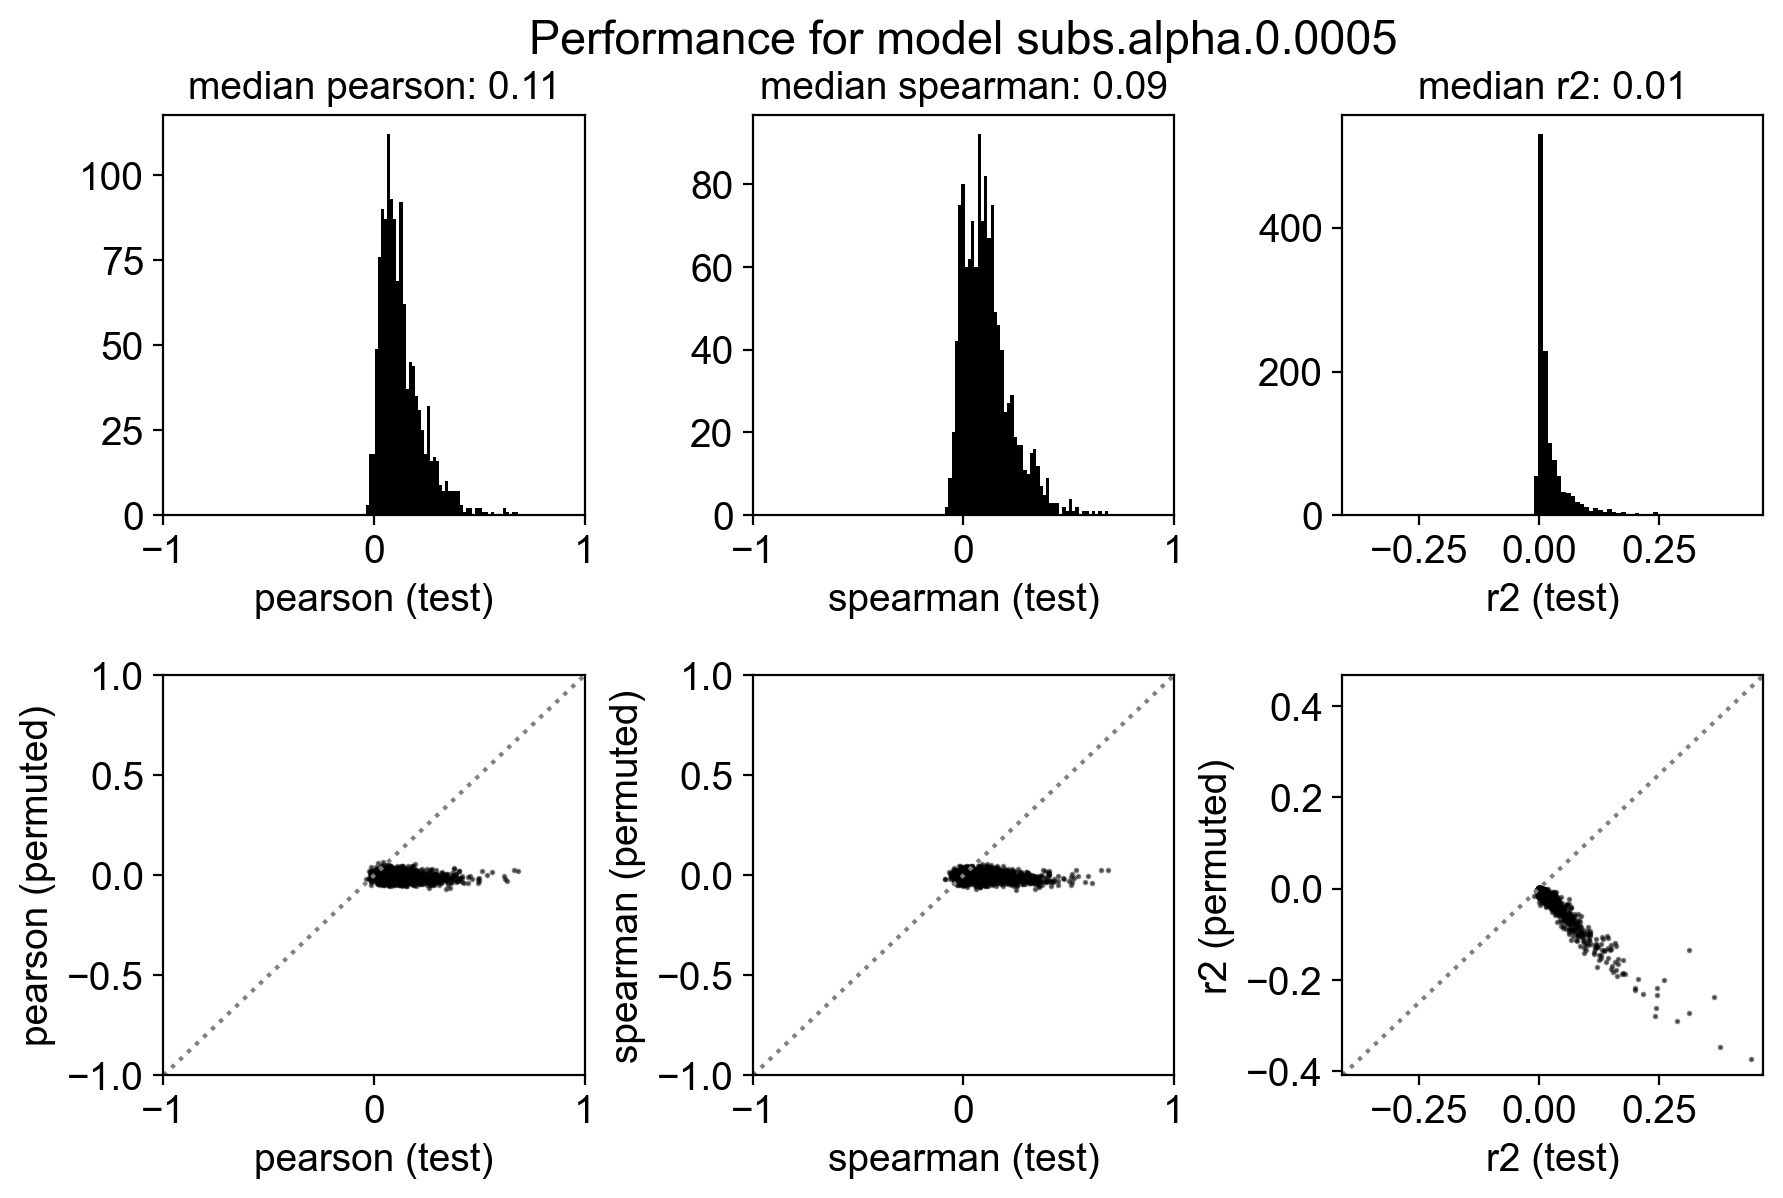

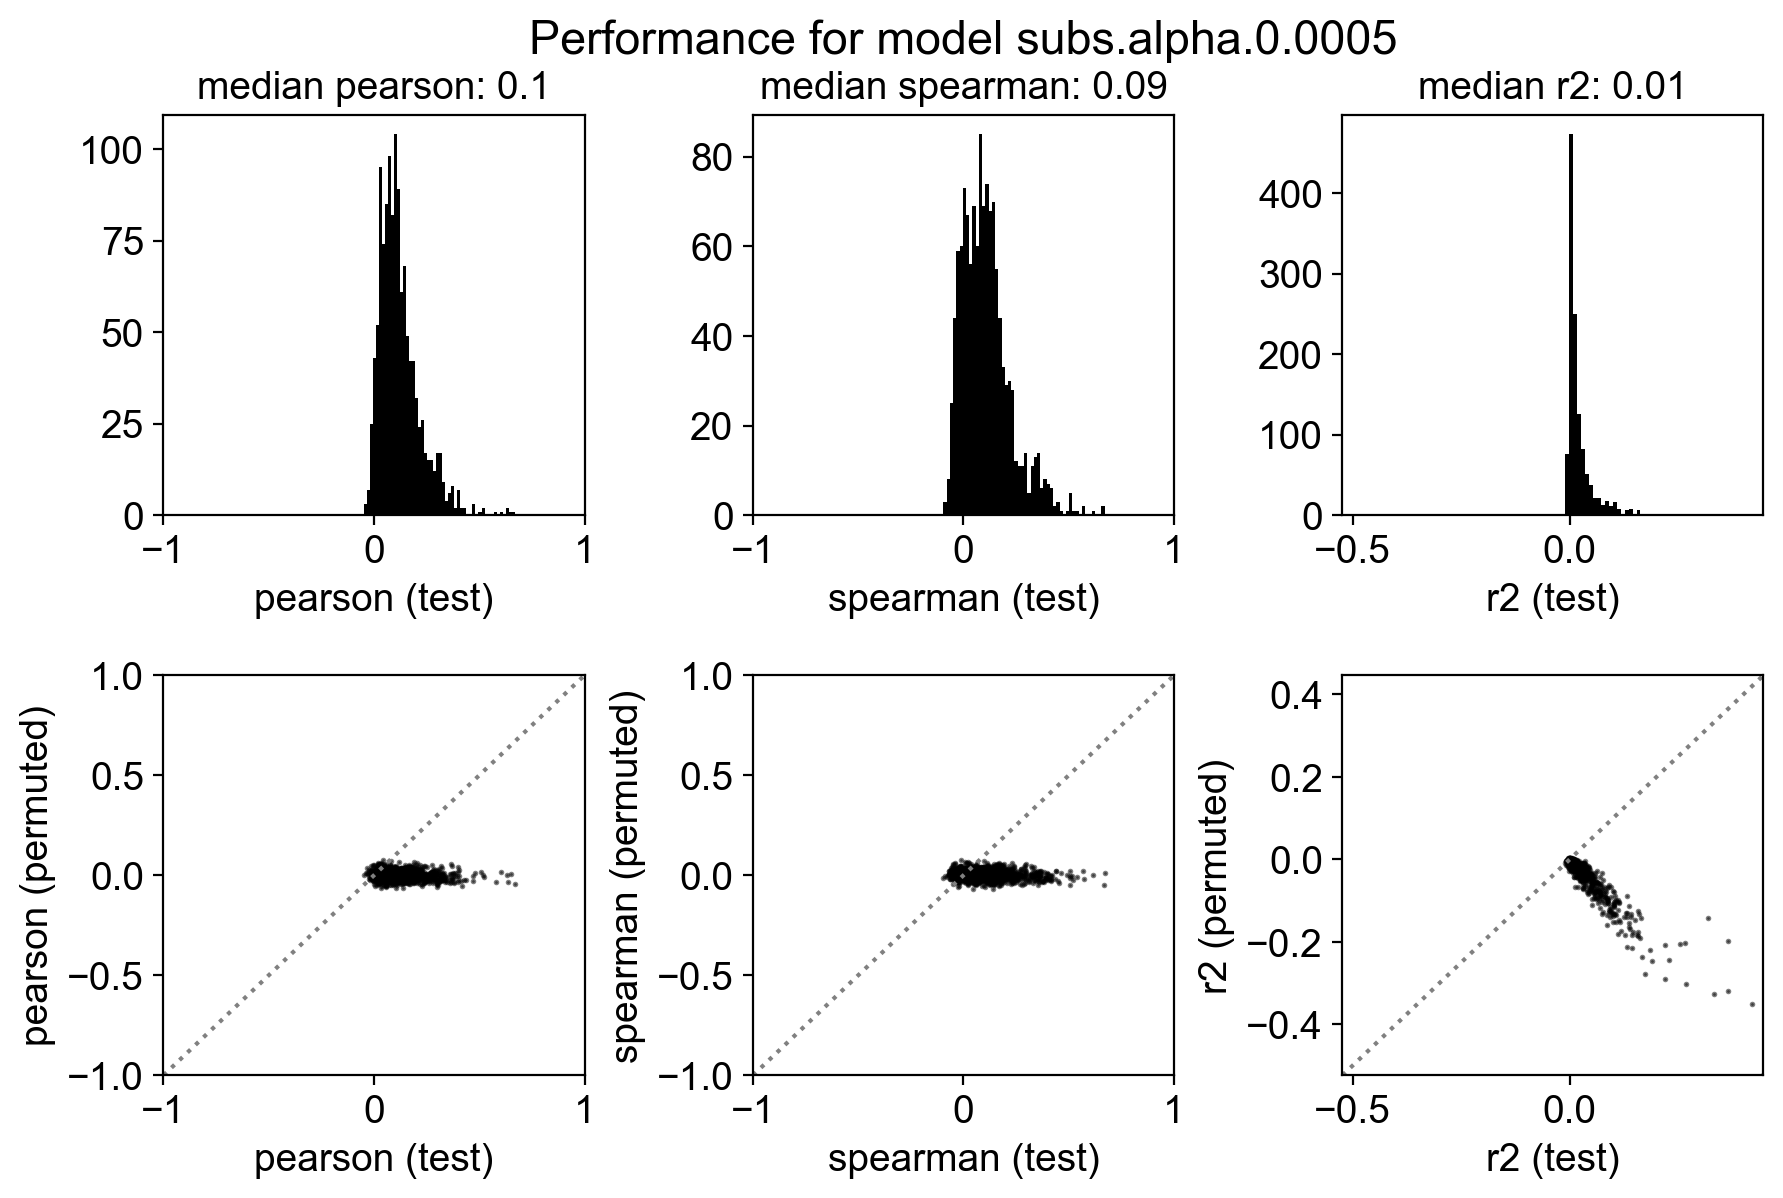

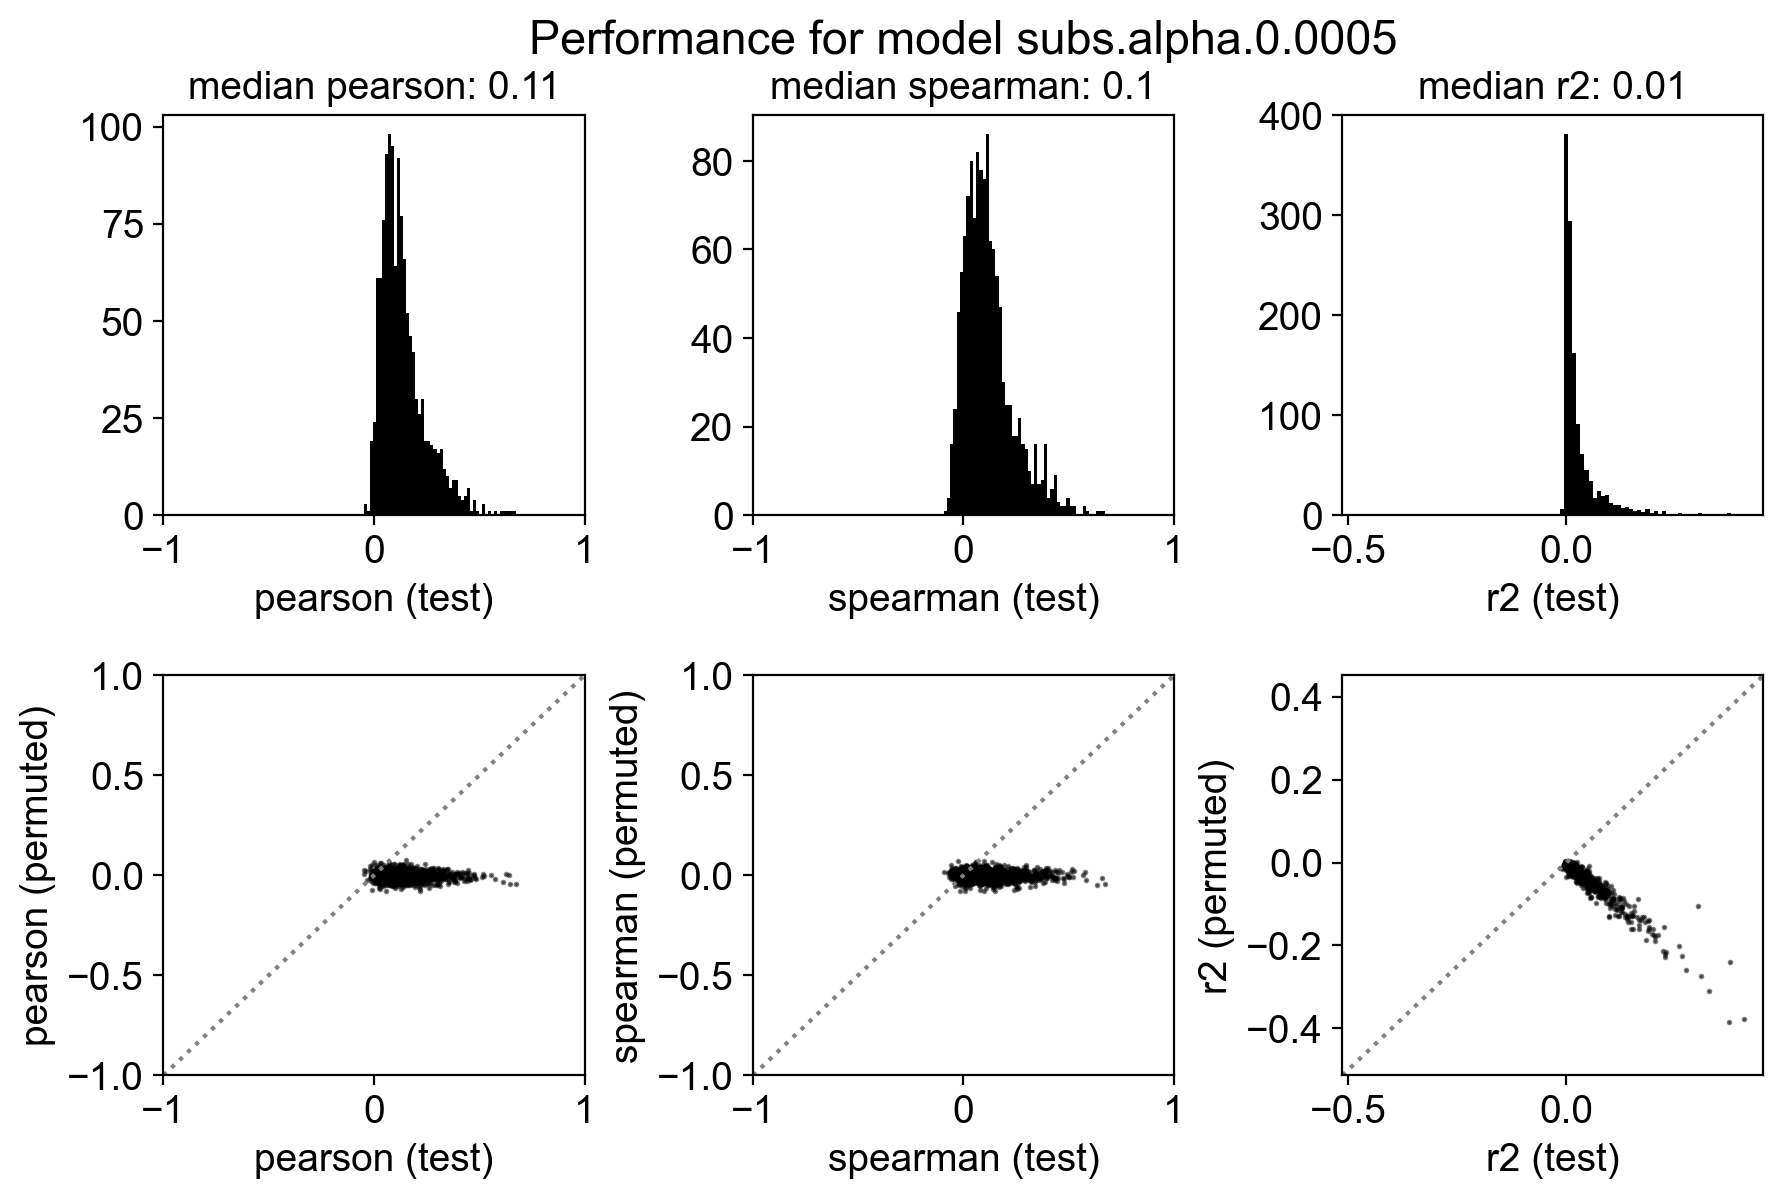

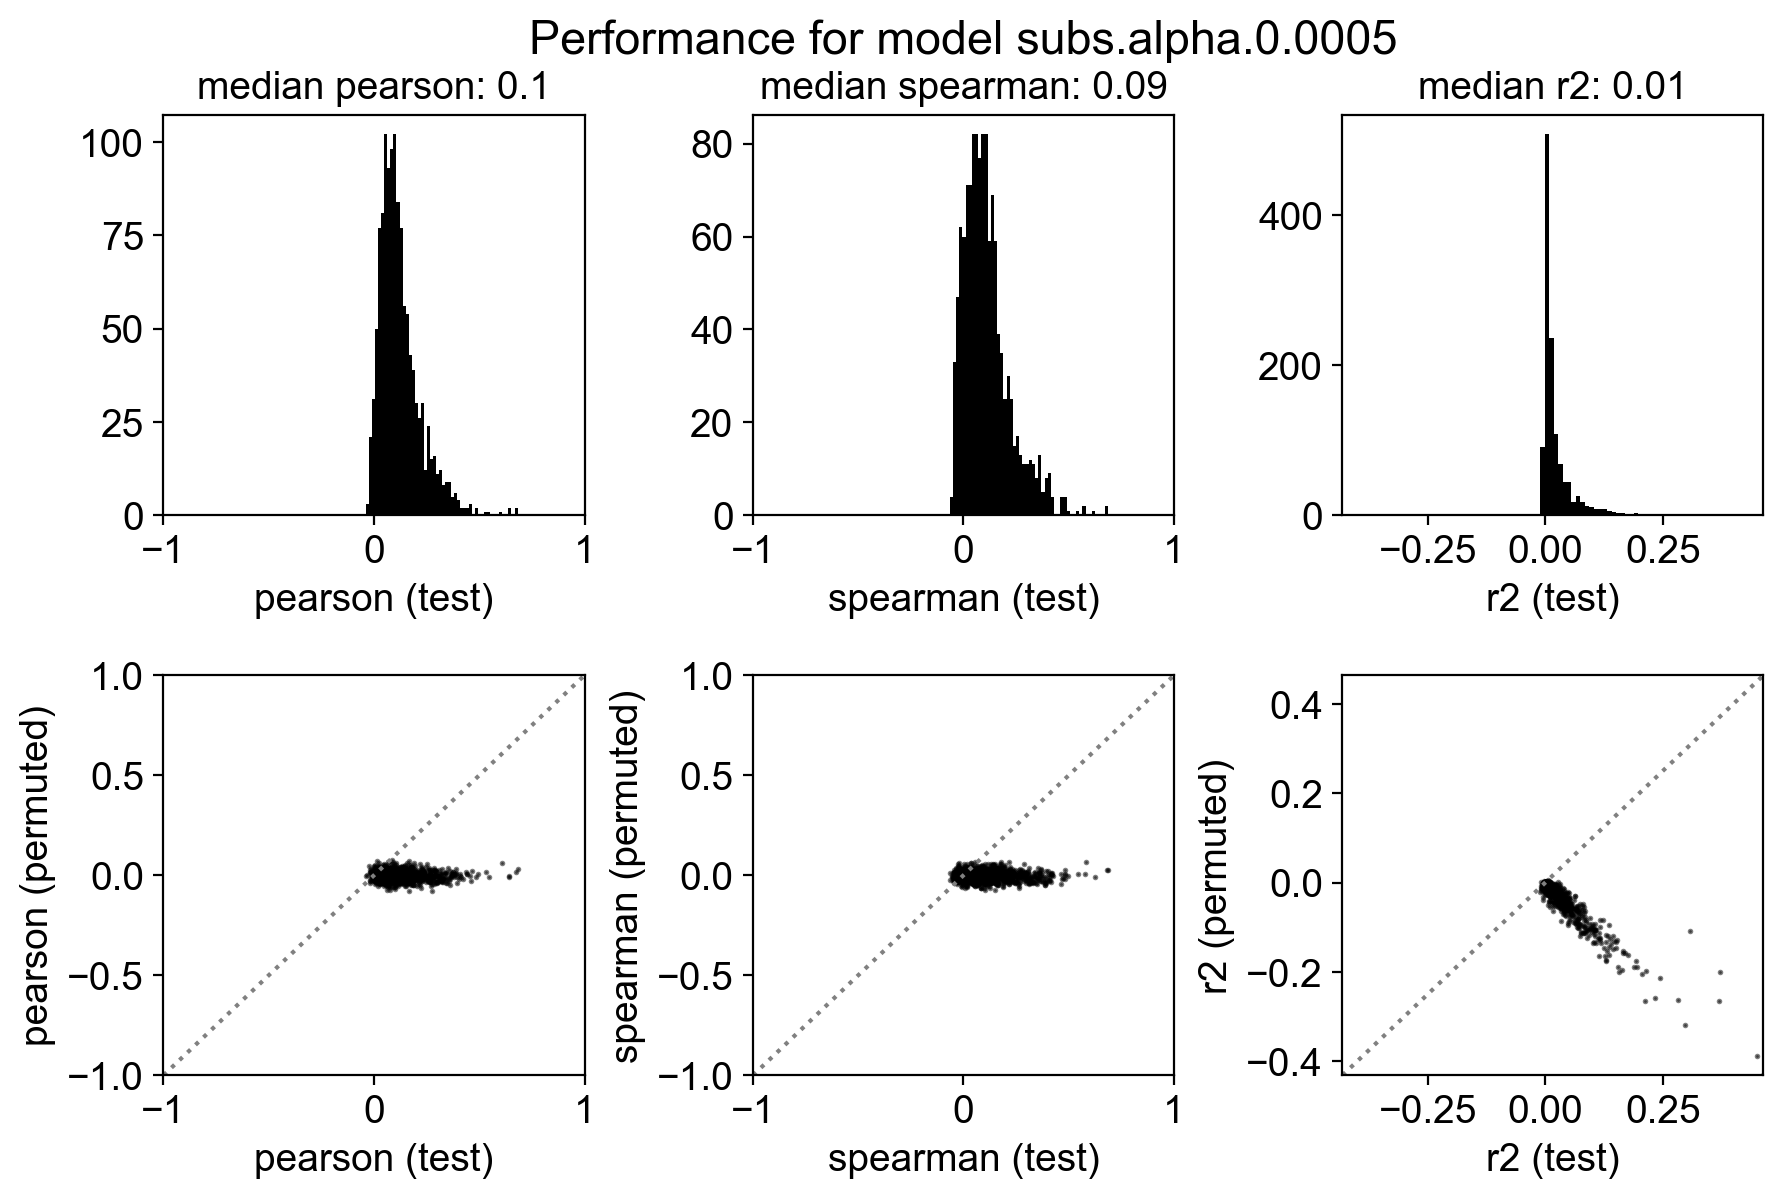

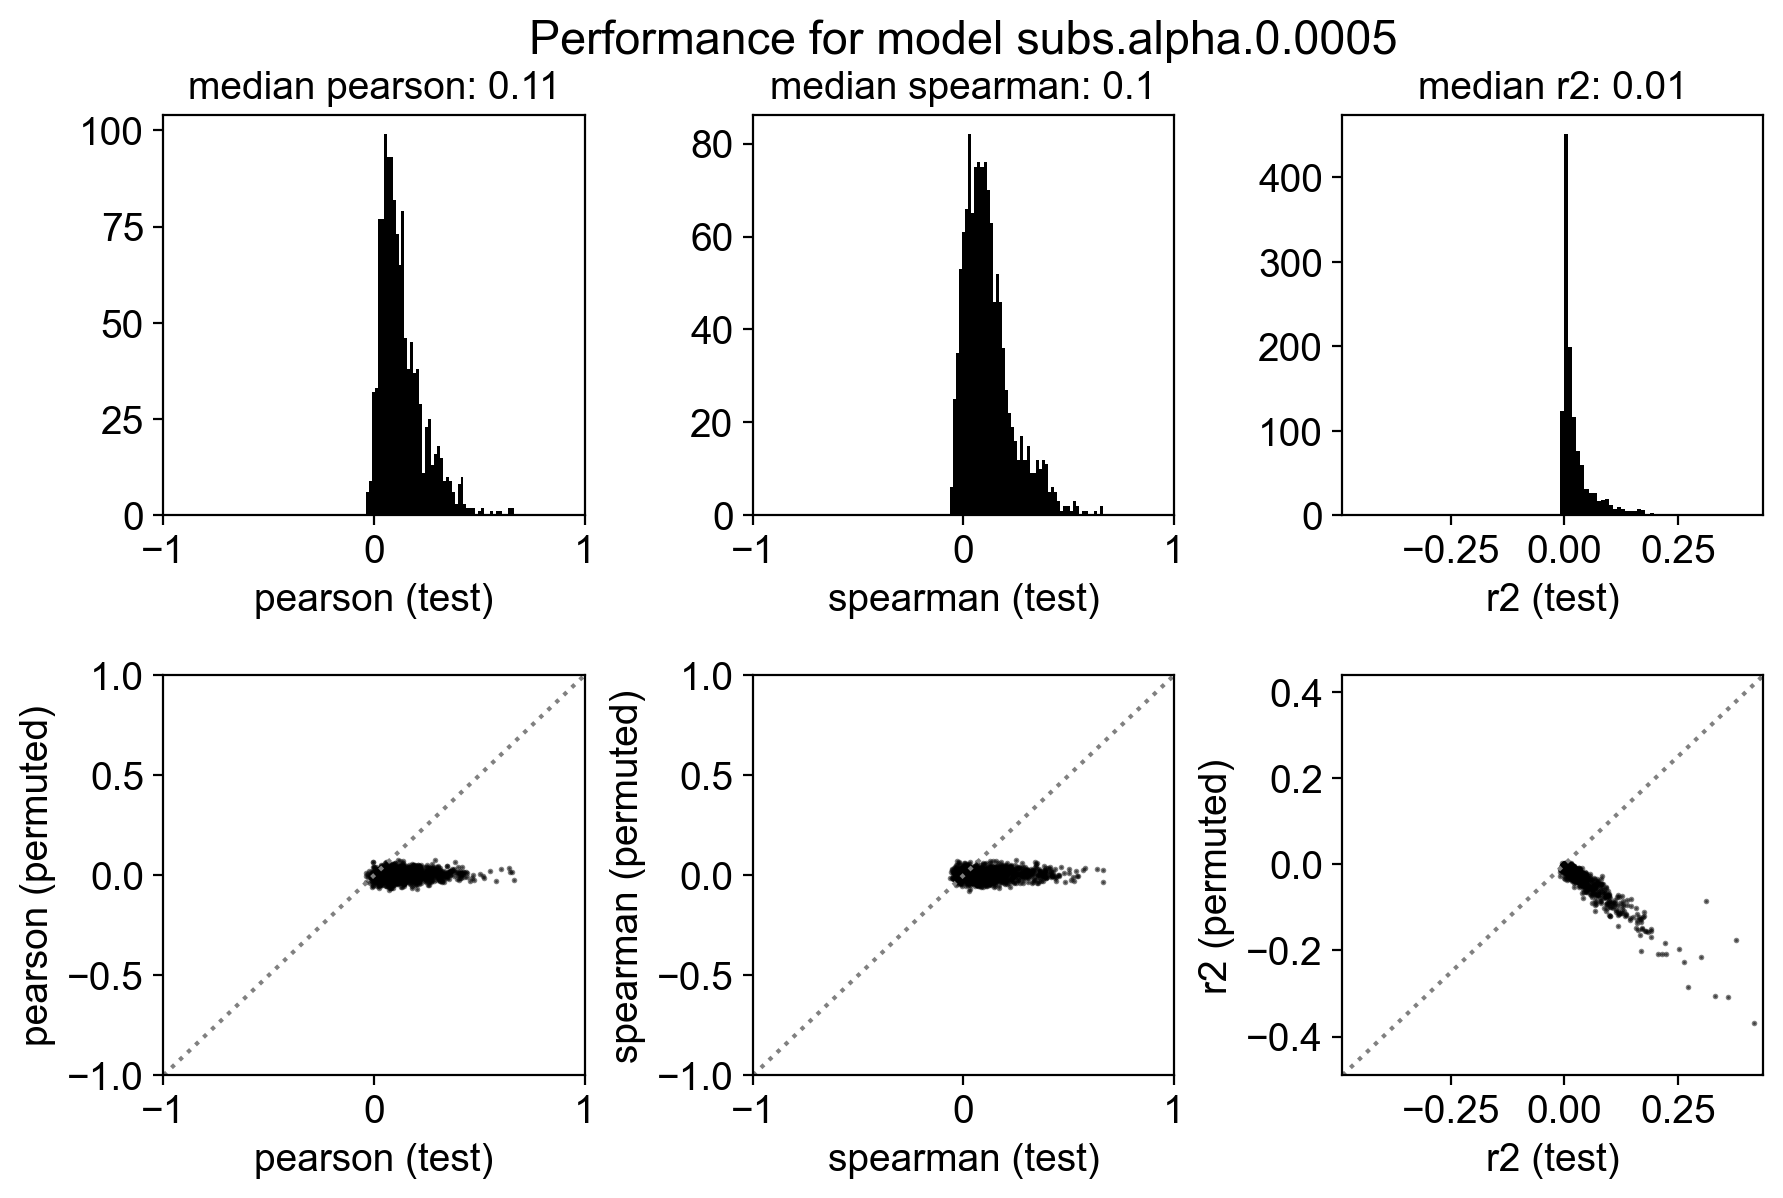

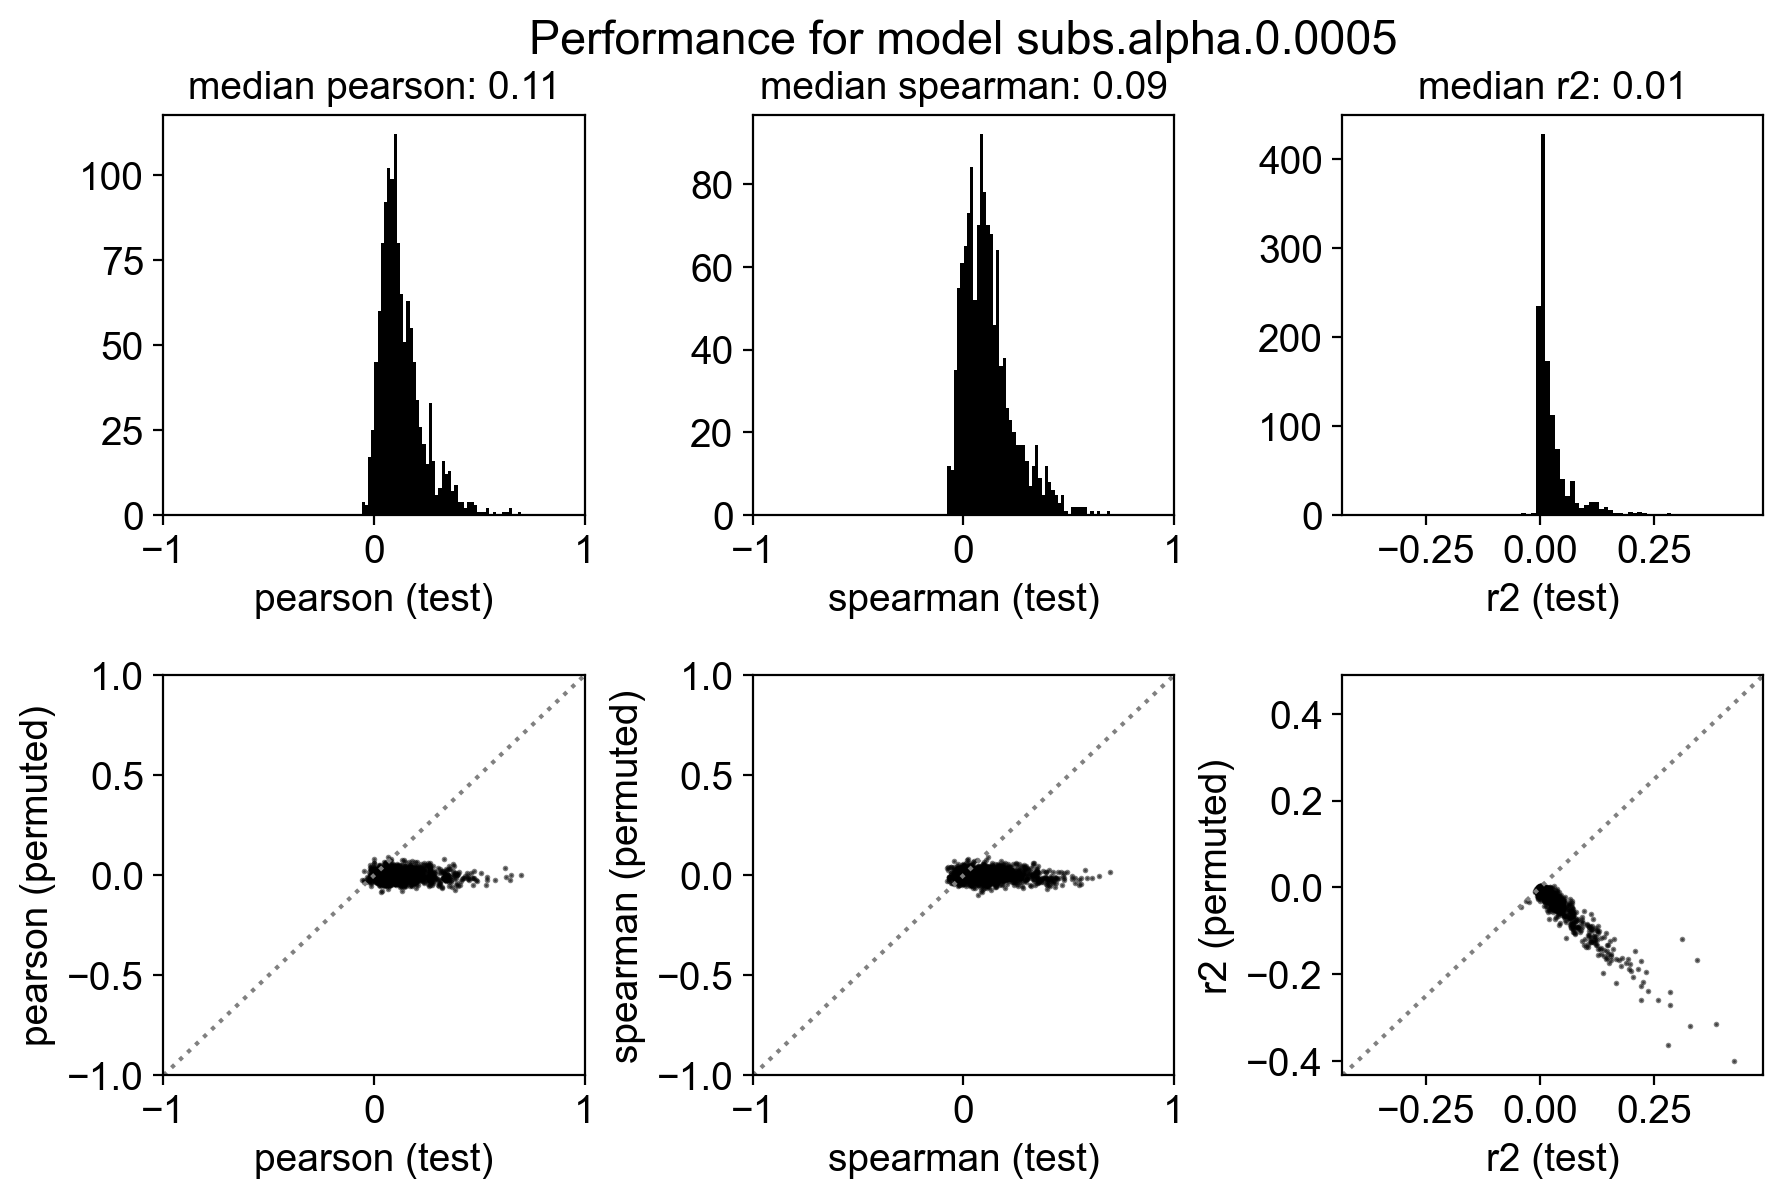

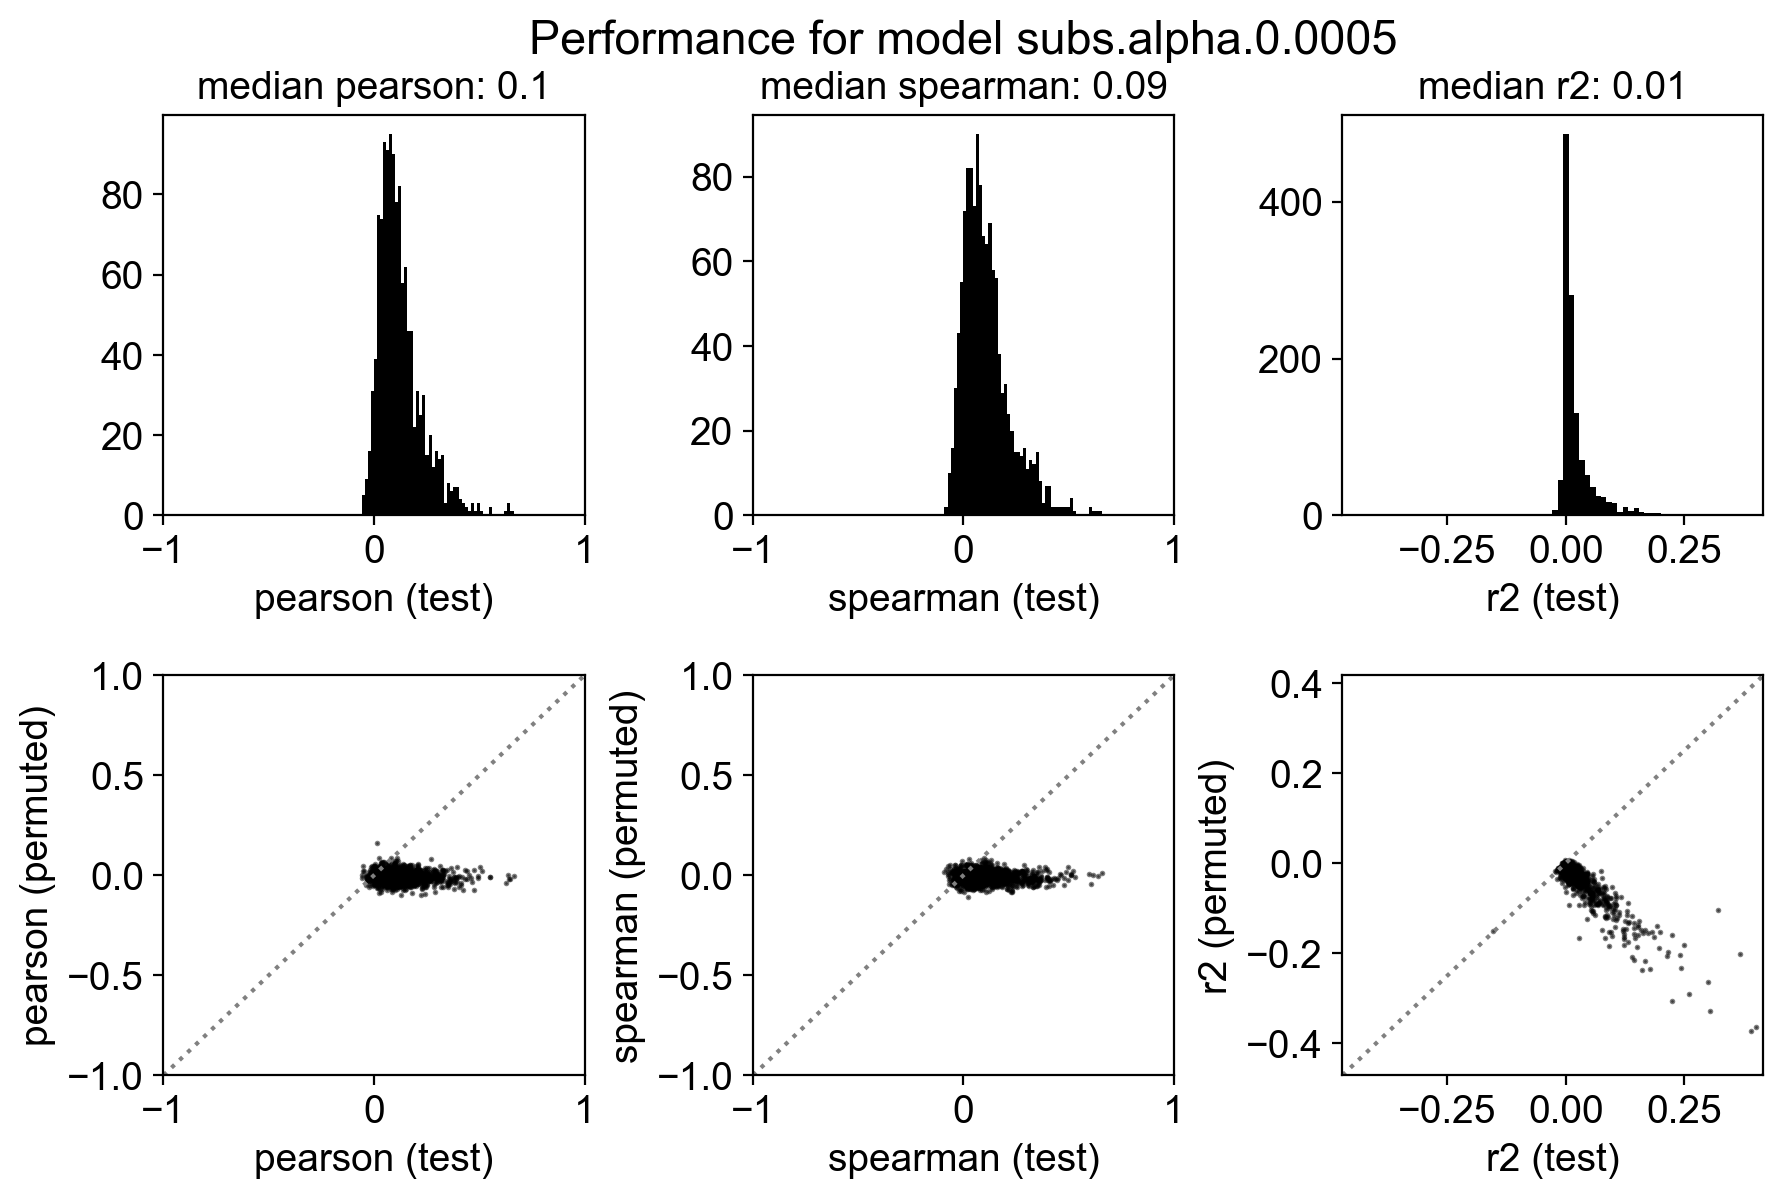

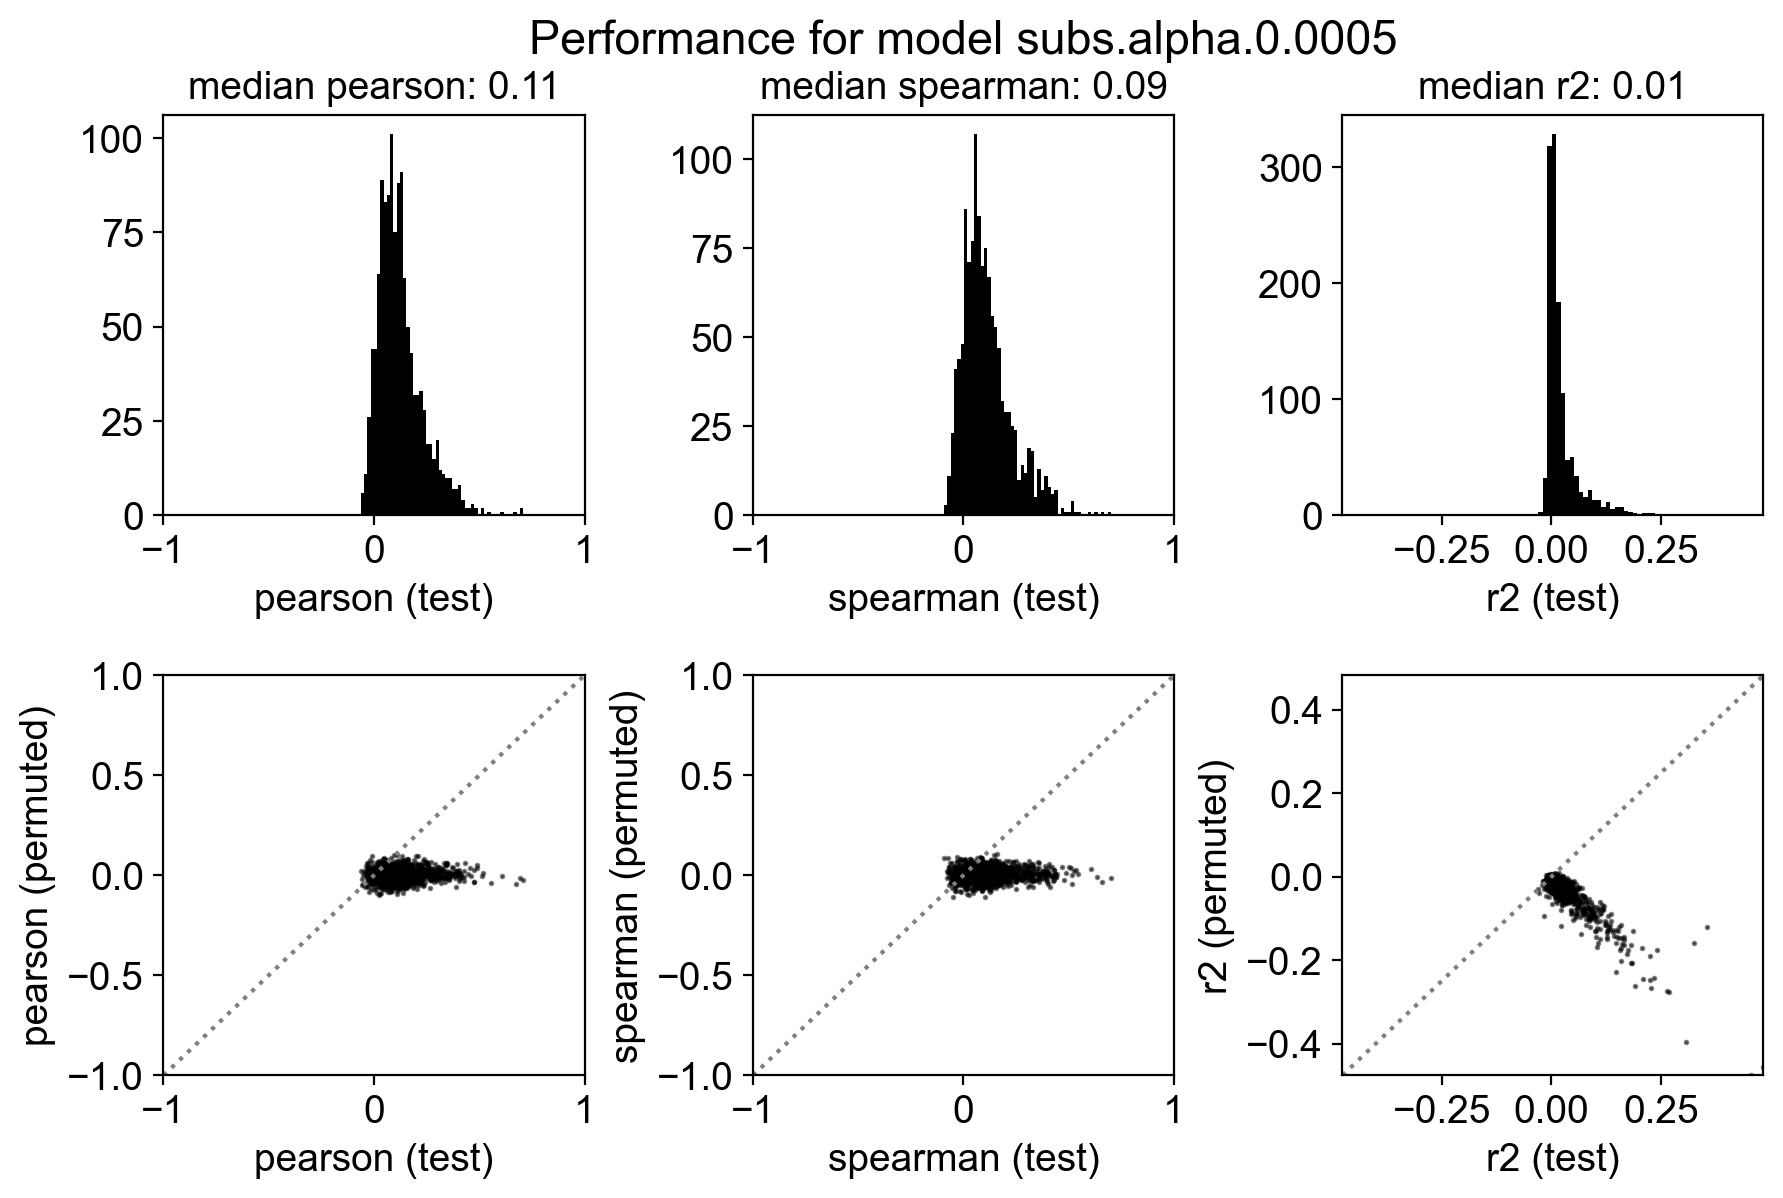

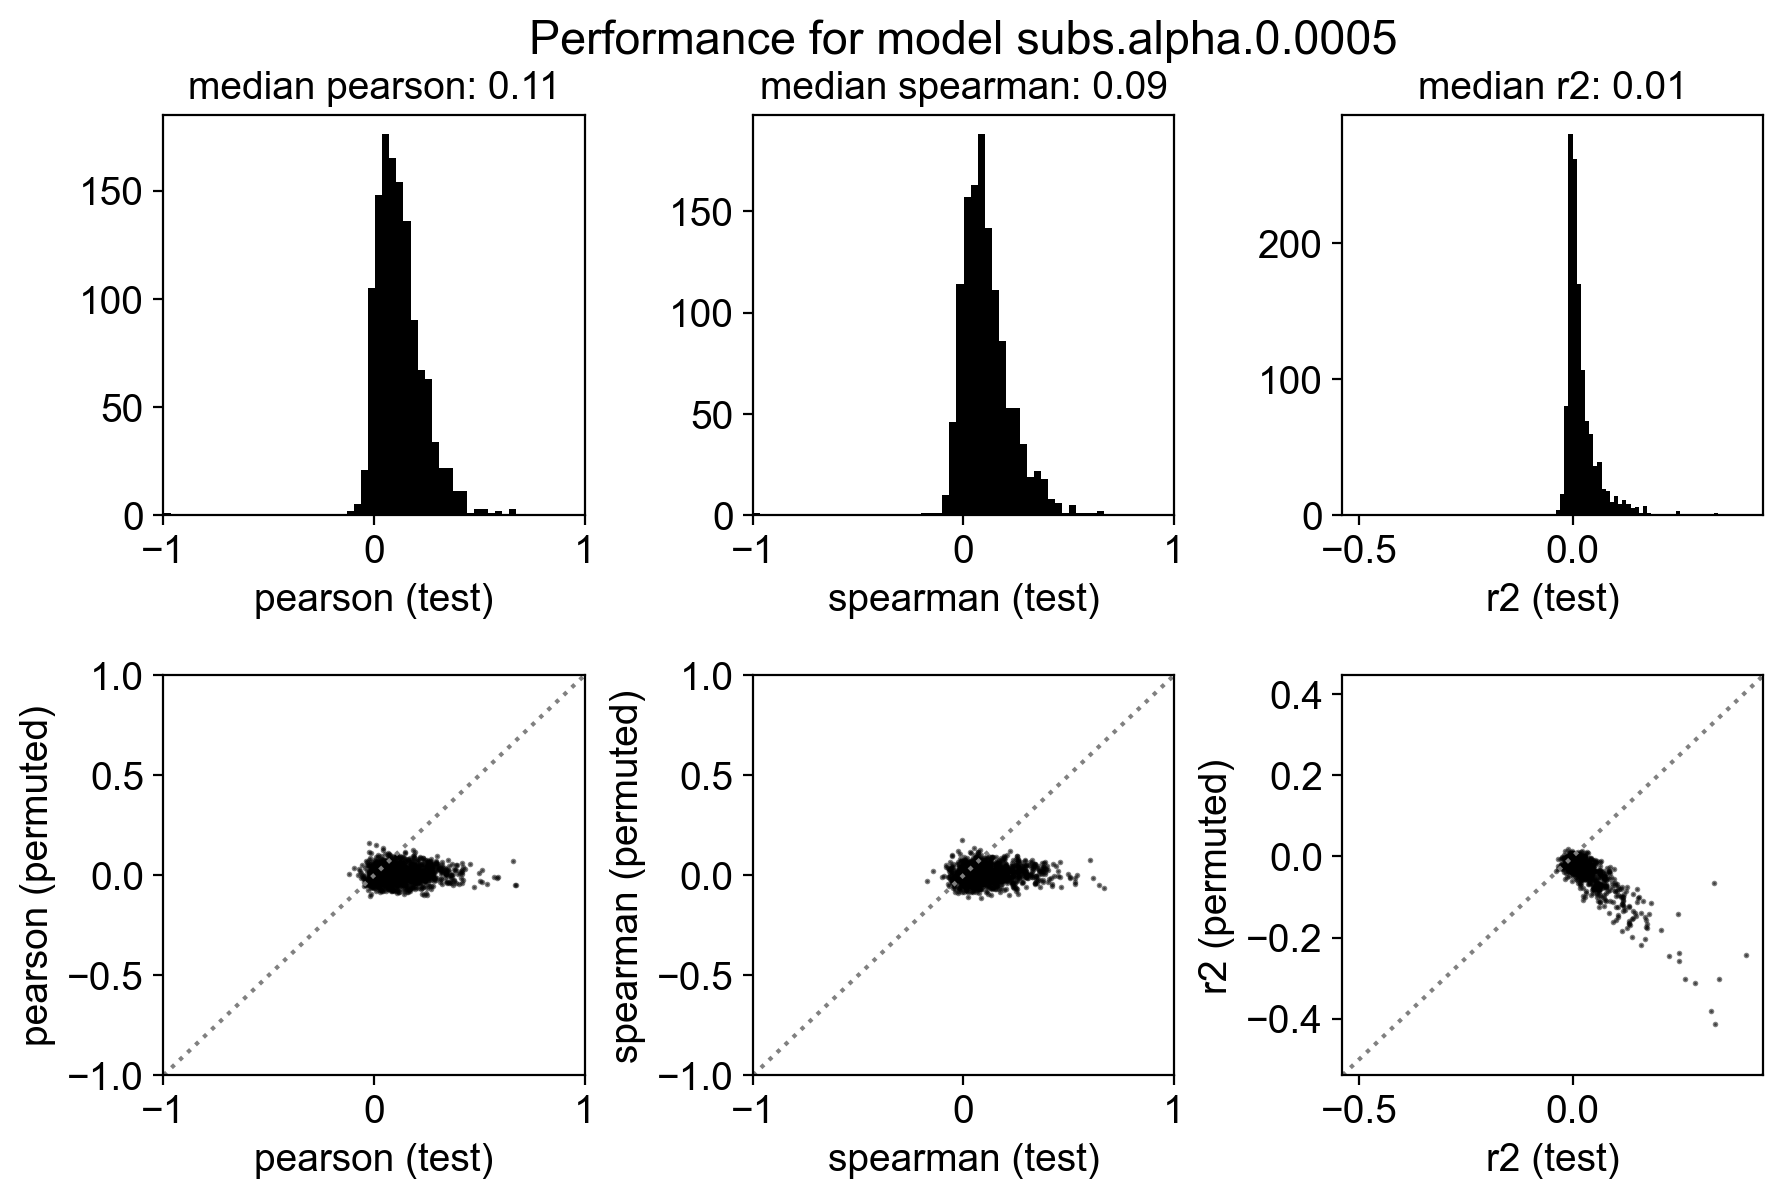

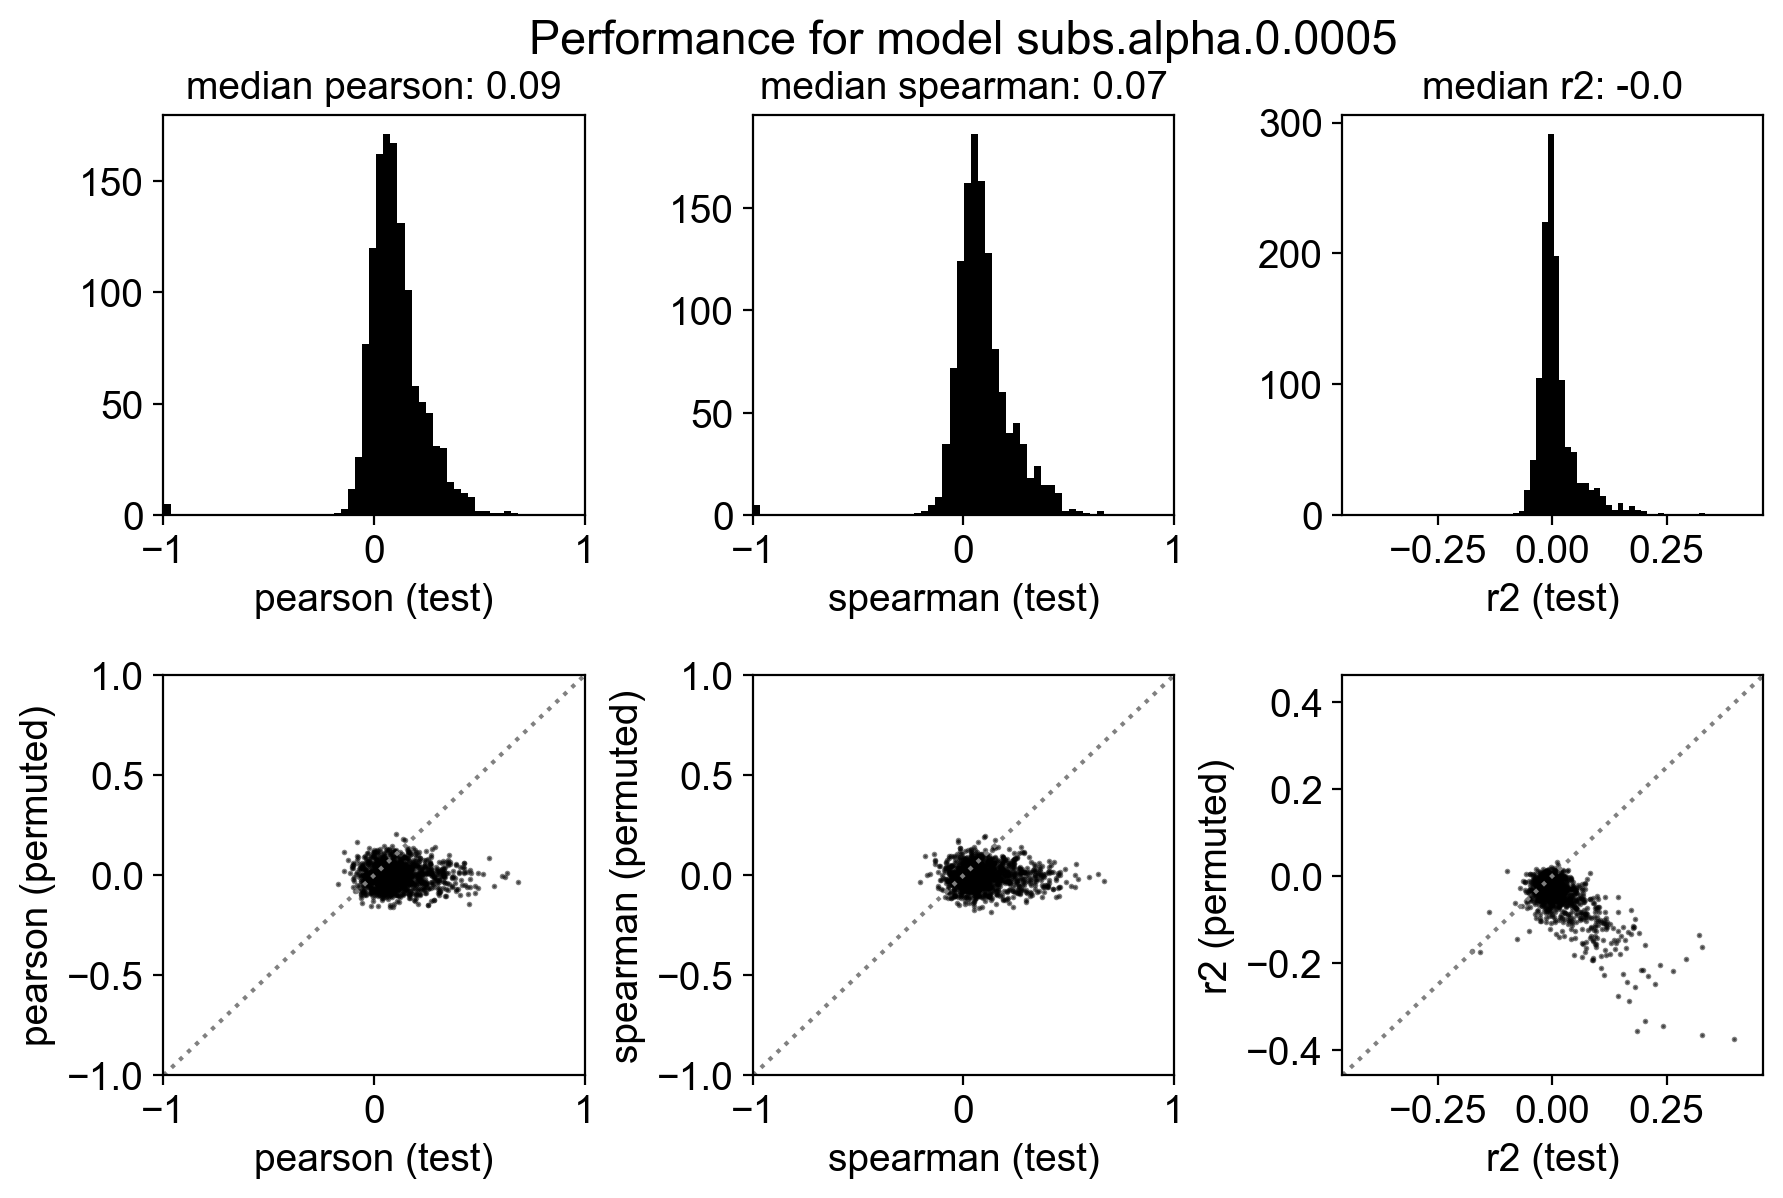

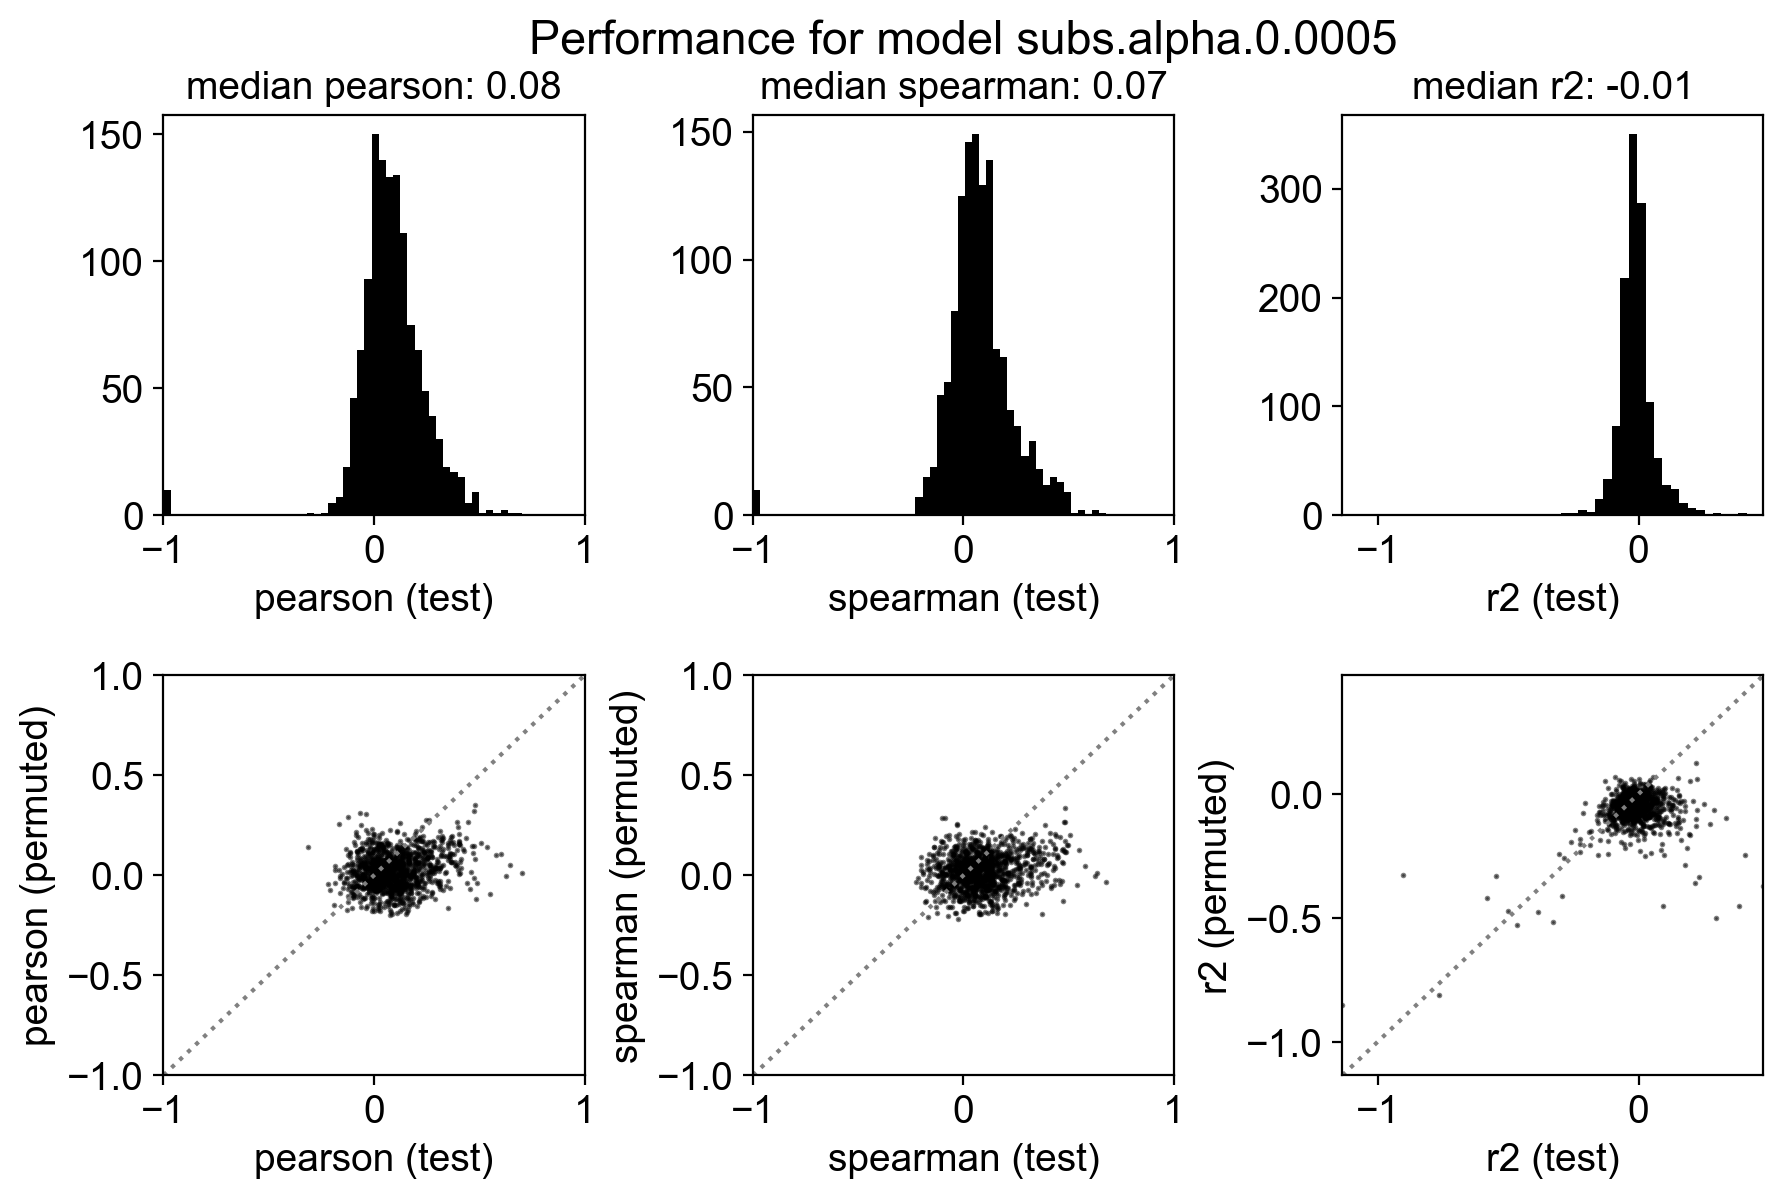

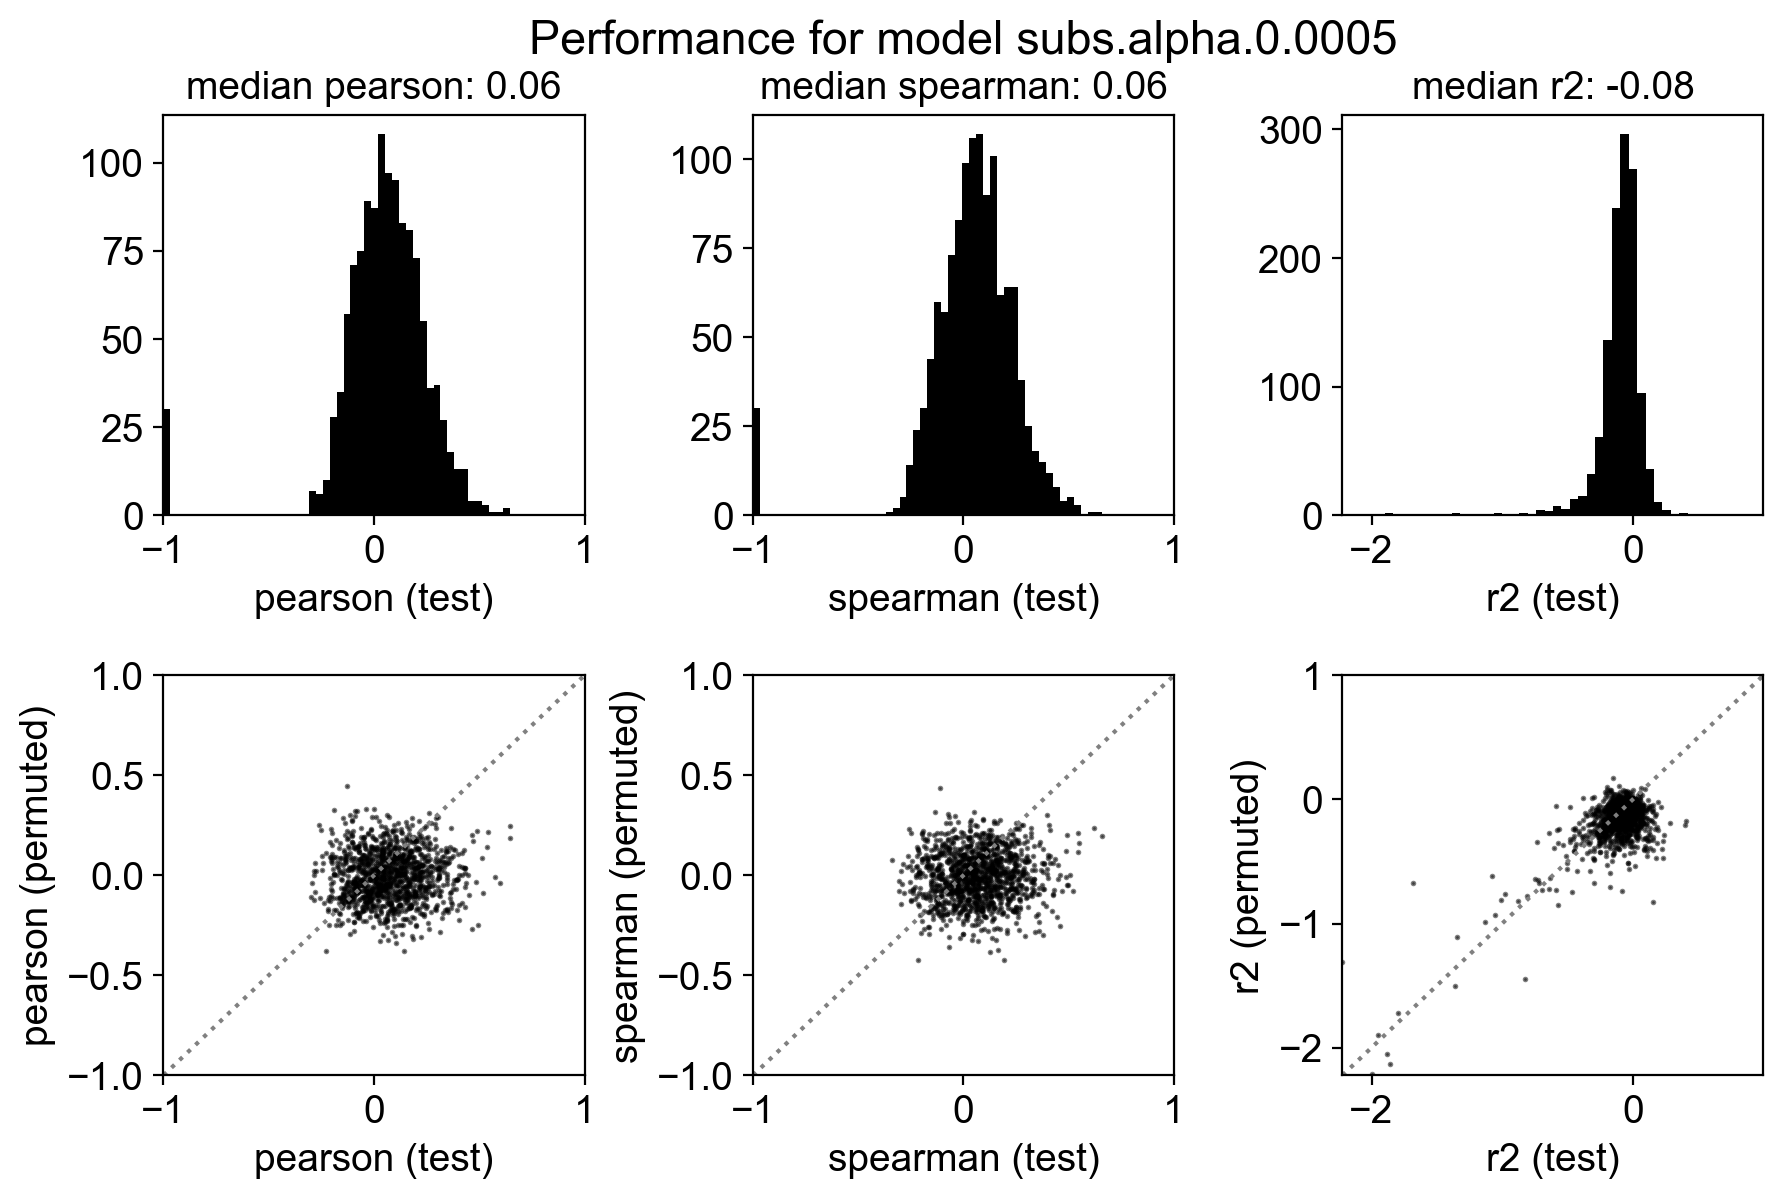

In [25]:
subs_list=[1000,900,800,700,600,500,400,300,200,100,50,20]
subs_df=pd.DataFrame({'Cells/perturbation':subs_list,'Correlation':0},index=subs_list)


for subs in subs_list:
    reg=linear_model.ElasticNet(l1_ratio=0.5,alpha=alpha,max_iter=10000,random_state=my_rng)
    modelname='subs.alpha.'+str(alpha)

    adata_small=perturb.pp.subsample_cells(adata_small,subs,'gene.compact')

    perturb.lm.train_lm(adata_small,
        lm=reg,
        include_expression=True,
        y_obs=[],
        model_name=modelname,
        perturbations_list=genes_perturbed,
        covariates_list=covariates,
        my_rng=np.random.RandomState(1234),
        adjust=False,
         adjust_vars=[],
        copy_adata=False,
        keep_unassigned=False,
         control_names=['control'],
       use_raw=True)

    perturb.pl.plot_model_performance(adata_small,modelname)
    coef_subs=adata_small.uns['PS.subs.alpha.'+str(alpha)+'.coef'].loc[:,genes_perturbed]

    from scipy.stats import spearmanr,pearsonr
    subs_corr=pearsonr(np.array(coef_orig).flatten(),np.array(coef_subs).flatten())

    subs_df.loc[subs,'Correlation']=subs_corr[0]

In [26]:
subs_df

Cells/perturbation  Correlation
1000                1000     0.981852
900                  900     0.981040
800                  800     0.978975
700                  700     0.975433
600                  600     0.970907
500                  500     0.963277
400                  400     0.950928
300                  300     0.930253
200                  200     0.882884
100                  100     0.749787
50                    50     0.630607
20                    20     0.454430

In [40]:
FIGS

'/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/'

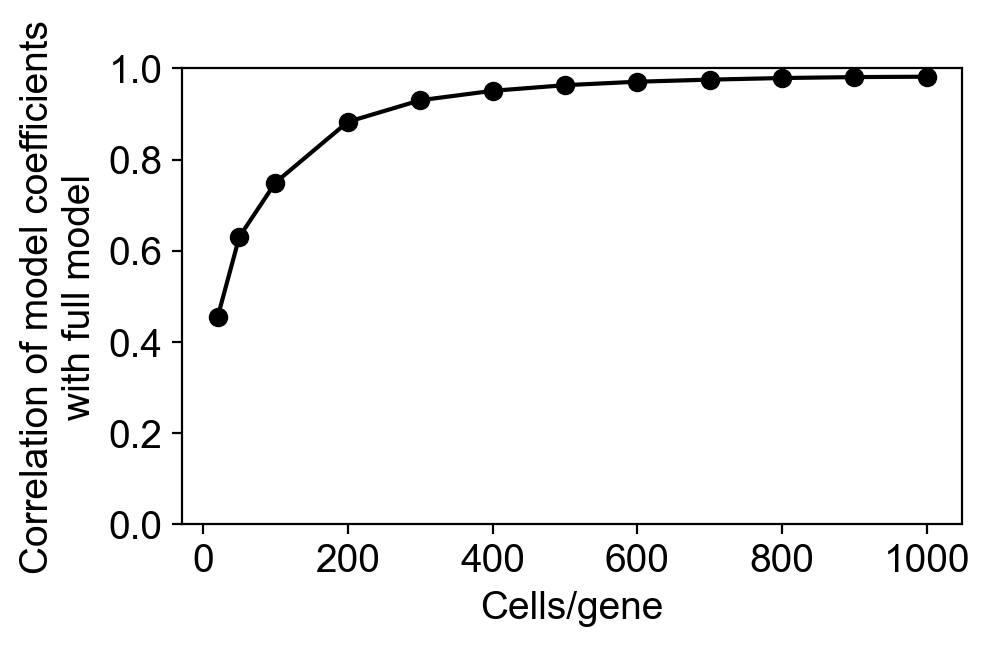

In [43]:
fig,plots=plt.subplots(1)
fig.set_size_inches(5,3)

plots.plot(subs_df['Cells/perturbation'],
            subs_df['Correlation'],
         color='black',
           )
plots.scatter(subs_df['Cells/perturbation'],
            subs_df['Correlation'],
         color='black',
           )
plots.set_ylim(0,1)
plots.set_xlabel('Cells/gene')
plots.set_ylabel('Correlation of model coefficients\nwith full model')
#plots.axvline(x=100,linestyle='dotted',color='lightgray')
plots.grid(False)

plt.savefig(FIGS+'single.regMat.corr'+modelname+'.line.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'single.regMat.corr'+modelname+'.line.png',transparent=True,bbox_inches='tight')

